In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,RandomizedSearchCV,KFold,GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

from sklearn.preprocessing import StandardScaler

from scipy.stats import uniform, randint

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

from collections import Counter
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN


import warnings
warnings.filterwarnings('ignore')

For banks, risk management and default detection have always been a crucial part in issuing credit cards. Defaults on credit card bill payment can result in a great financial loss. In order to reduce or even prevent loss of this kind, banks need to determine appropriately given credit for each specific client based on their information.


I conducted a credit card issue risk assessment following a structured process. First, I performed data cleansing on a dataset of over 30,000 clients to identify and correct inaccuracies. I then  analyzed the data to identify relevant variables impacting default risk, using data visualization. For the prediction phase, I selected and implemented appropriate statistical methods to model the probability of default, splitting the data into training and testing sets to validate accuracy. Based on the prediction model, I devised a decision-making strategy for credit issuance to minimize risk.
Here, “July_Payment_Status” is a target variable. 

# Data Dictionary

- Credit_Limit: Maximum amount of credit in Canadian Dollar that a bank will extend to a debtor.
- Sex: “1” = Male, “2” = Female, other values = unknown
- Education: “1” = Master's degree & Doctoral Degree, “2” =Bachelor’s Degree, “3” =High School’s Degree, “4” = Others, other value = unknown
- Marital_Status: “1” = Married, “2” = Single, “3” = Others, other value  = unknown)
- Age: Client’s age in years.

**Repayment is the act of paying back money previously borrowed from a lender. **

- Jan_Repay_Status: “-n” = paid on time properly, “n” = payment delayed for n month already
- Feb_Repay_Status:-n” = paid on time properly, “n” = payment delayed for n month already
- Mar_Repay_Status:-n” = paid on time properly, “n” = payment delayed for n month already
- Apr_Repay_Status:-n” = paid on time properly, “n” = payment delayed for n month already
- May_Repay_Status:-n” = paid on time properly, “n” = payment delayed for n month already
- Jun_Repay_Status:-n” = paid on time properly, “n” = payment delayed for n month already
- Previous_Payment_Prior_Jan:The amount of previous payment in Canadian Dollar in January.
- Previous_Payment_Prior_Feb:The amount of previous payment in Canadian Dollar in February.
- Previous_Payment_Prior_Mar:The amount of previous payment in Canadian Dollar in March.
- Previous_Payment_Prior_Apr:The amount of previous payment in Canadian Dollar in April.
- Previous_Payment_Prior_May:The amount of previous payment in Canadian Dollar in May.
- Previous_Payment_Prior_Jun:The amount of previous payment in Canadian Dollar in June.

**The statement balance is the amount shown on your bill and reflects the total amount that you owe on the credit card up to the end of your most recent billing cycle. This is the balance that you need to pay by the due date so that no interest is applied.**
- Jan_Statement:Jan Statement Balance
- Feb_Statement:Feb Statement Balance
- Mar _Statement: March Statement Balance
- Apr _Statement:April Statemnt Balance
- May _Statement:May Statement Balance
- Jun _Statement: June Statement Balance
- July_Payment_Status: Whether clients default on their July Statement. “0” = Paid on time, “1” = Defaulted on July Statement Balance

In [2]:
df= pd.read_csv('data for participants.csv')

In [3]:
df.head()

,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
0,9600.0,1.0,3.0,3.0,32.0,6.0,110.0,138.0,5.0,2847.0,...,7.0,331.0,1080.0,12.0,535.0,1671.0,3.0,4800.0,6799.0,1.0
1,14400.0,2.0,3.0,2.0,30.0,-2.0,0.0,132.0,-2.0,0.0,...,-2.0,0.0,0.0,-2.0,45.0,0.0,-2.0,136.0,45.0,0.0
2,8100.0,1.0,1.0,2.0,29.0,-1.0,133.0,7.0,-1.0,1700.0,...,-1.0,751.0,-4.0,-1.0,498.0,747.0,-1.0,381.0,496.0,0.0
3,2700.0,2.0,2.0,1.0,31.0,0.0,104.0,2891.0,0.0,140.0,...,0.0,40.0,2842.0,0.0,60.0,1187.0,0.0,19.0,1153.0,0.0
4,14500.0,2.0,2.0,1.0,37.0,-2.0,309.0,403.0,-2.0,94.0,...,-2.0,362.0,381.0,-2.0,0.0,362.0,-2.0,116.0,0.0,0.0


Problem Definition: Your MD would like your team to use data mining
methods to provide a reasonable model to predict the probability of default, a better decision-
making mechanism on credit issuing and put together a presentation on your data analysis to
present to your superiors.

In [4]:
df.columns

Index(['Credit_Limit', 'Sex', 'Education', 'Marital_Status', 'Age',
       'Jan_Repay_Status', 'Previous_Payment_Prior_Jan', 'Jan_Statement',
       'Feb_Repay_Status', 'Previous_Payment_Prior_Feb', 'Feb_Statement',
       'Mar_Repay_Status', 'Previous_Payment_Prior_Mar', 'Mar_Statement',
       'Apr_Repay_Status', 'Previous_Payment_Prior_Apr', 'Apr_Statement',
       'May_Repay_Status', 'Previous_Payment_Prior_May', 'May_Statement',
       'Jun_Repay_Status', 'Previous_Payment_Prior_Jun', 'Jun_Statement',
       'July_Payment_Status'],
      dtype='object')

In [5]:
df.shape

(30602, 24)

In [6]:
'''from ydata_profiling import ProfileReport

report = ProfileReport(df, minimal=True)
report.to_notebook_iframe()
 '''

'from ydata_profiling import ProfileReport\n\nreport = ProfileReport(df, minimal=True)\nreport.to_notebook_iframe()\n '

# Understanding Target Column

In [7]:
df['July_Payment_Status'].value_counts(dropna=False)

0.0    23713
1.0     6885
2.0        3
NaN        1
Name: July_Payment_Status, dtype: int64

In [96]:
def countplot_data(data, feature,title):
    '''
        Method to compute countplot of given dataframe
        Parameters:
            data(pd.Dataframe): Input Dataframe
            feature(str): Feature in Dataframe
    '''  
    sns.countplot(x=feature, data=data)
    plt.title(title)


    

In [97]:
counts = df['July_Payment_Status'].value_counts().reset_index()
counts

,index,July_Payment_Status
0,0.0,23652
1,1.0,6852


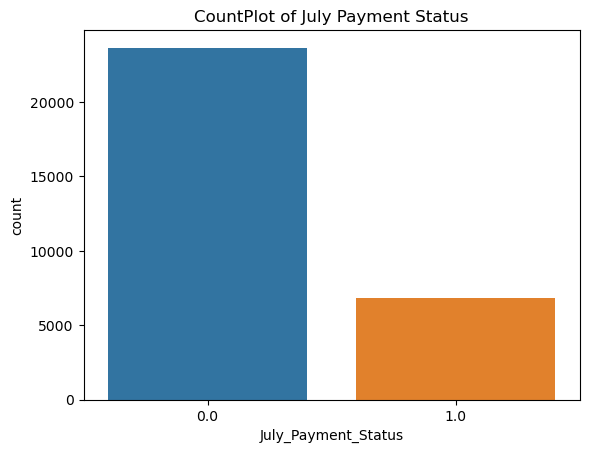

In [98]:
countplot_data(df, df.July_Payment_Status,'CountPlot of July Payment Status')

# Data Cleansing


In [10]:
df = df[df['July_Payment_Status'] != 2.0] #removing values with 2.0 cause it has no meaning 

In [11]:
#get the count of duplicate values
df.duplicated().sum()

17

In [12]:
#drop duplicate values
df.drop_duplicates(inplace=True)
df.shape #shape after removing duplicate values

(30582, 24)

In [13]:
#find the null values 
df.isnull().sum()

Credit_Limit                  0
Sex                           1
Education                     3
Marital_Status                4
Age                           7
Jan_Repay_Status              5
Previous_Payment_Prior_Jan    3
Jan_Statement                 7
Feb_Repay_Status              2
Previous_Payment_Prior_Feb    5
Feb_Statement                 7
Mar_Repay_Status              3
Previous_Payment_Prior_Mar    2
Mar_Statement                 4
Apr_Repay_Status              4
Previous_Payment_Prior_Apr    2
Apr_Statement                 3
May_Repay_Status              1
Previous_Payment_Prior_May    4
May_Statement                 2
Jun_Repay_Status              2
Previous_Payment_Prior_Jun    2
Jun_Statement                 5
July_Payment_Status           1
dtype: int64

In [14]:
df.dropna(inplace=True)
df.shape

(30504, 24)

In [15]:
#Keeping only 1,2 as 3 for Sex
df['Sex'] = df['Sex'].apply(lambda x: x if x in [1, 2] else 3)
df['Sex'].value_counts()

2.0    18275
1.0    12074
3.0      155
Name: Sex, dtype: int64

In [16]:
#Keeping 1,2 as 3 for Marital_Status 
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: x if x in [1, 2] else 3)
df['Marital_Status'].value_counts()

2.0    16145
1.0    13823
3.0      536
Name: Marital_Status, dtype: int64

In [17]:
#Keeping 1,2,3,4 for Education 
df['Education'] = df['Education'].apply(lambda x: x if x in [1, 2,3] else 4)
df['Education'].value_counts()

2.0    14142
1.0    10688
3.0     5042
4.0      632
Name: Education, dtype: int64

# Data Understanding 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30504 entries, 1 to 30601
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Credit_Limit                30504 non-null  float64
 1   Sex                         30504 non-null  float64
 2   Education                   30504 non-null  float64
 3   Marital_Status              30504 non-null  float64
 4   Age                         30504 non-null  float64
 5   Jan_Repay_Status            30504 non-null  float64
 6   Previous_Payment_Prior_Jan  30504 non-null  float64
 7   Jan_Statement               30504 non-null  float64
 8   Feb_Repay_Status            30504 non-null  float64
 9   Previous_Payment_Prior_Feb  30504 non-null  float64
 10  Feb_Statement               30504 non-null  float64
 11  Mar_Repay_Status            30504 non-null  float64
 12  Previous_Payment_Prior_Mar  30504 non-null  float64
 13  Mar_Statement               305

In [19]:
# statistically describe our dataset (only numerical columns)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Credit_Limit,30504.0,6676.124023,5169.684430,200.0,2100.0,5600.0,9500.00,40100.0
Sex,30504.0,1.609264,0.498229,1.0,1.0,2.0,2.00,3.0
Education,30504.0,1.856347,0.760215,1.0,1.0,2.0,2.00,4.0
Marital_Status,30504.0,1.564418,0.530097,1.0,1.0,2.0,2.00,3.0
Age,30504.0,35.781471,10.020409,15.0,28.0,34.0,42.00,102.0
Jan_Repay_Status,30504.0,0.056419,1.359729,-2.0,-1.0,0.0,0.00,12.0
Previous_Payment_Prior_Jan,30504.0,240.583563,692.168004,0.0,40.0,86.0,204.00,34942.0
Jan_Statement,30504.0,2057.421092,2938.351337,-6623.0,147.0,913.0,2710.00,38580.0
Feb_Repay_Status,30504.0,-0.056747,1.429761,-2.0,-1.0,0.0,0.00,12.0
Previous_Payment_Prior_Feb,30504.0,250.962005,940.597271,0.0,36.0,81.0,200.00,67370.0


# Outlier Detection

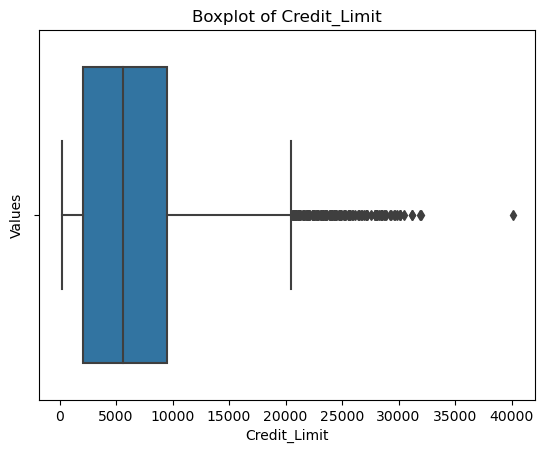

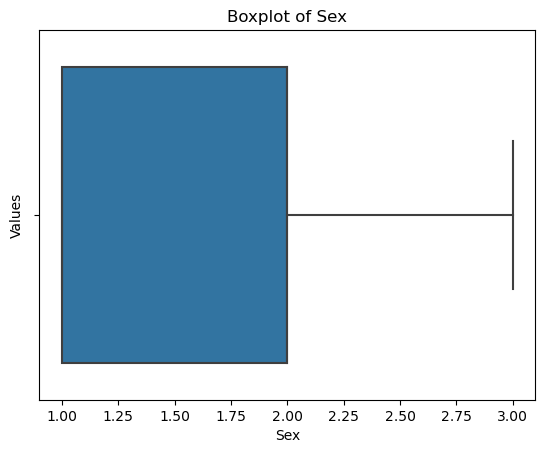

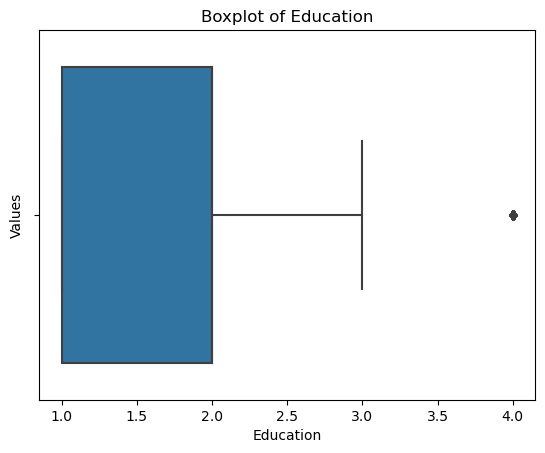

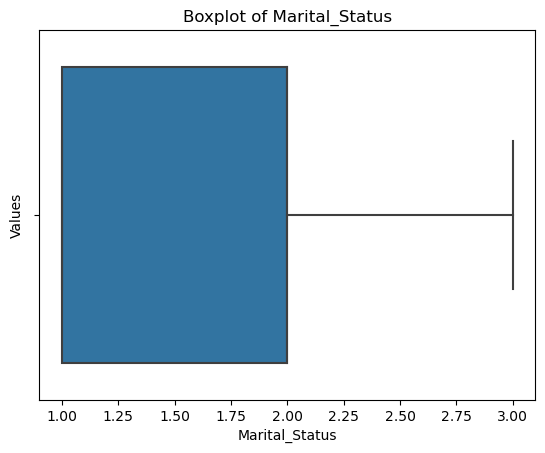

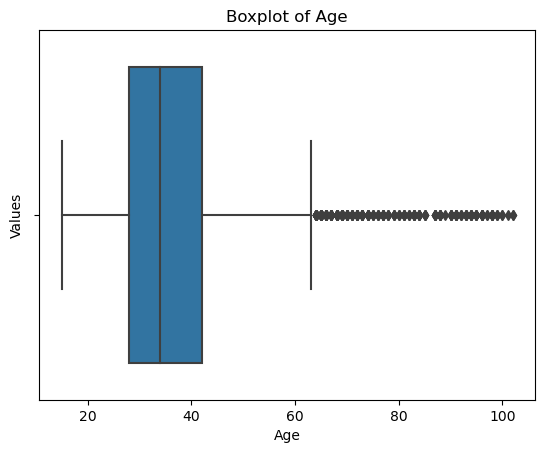

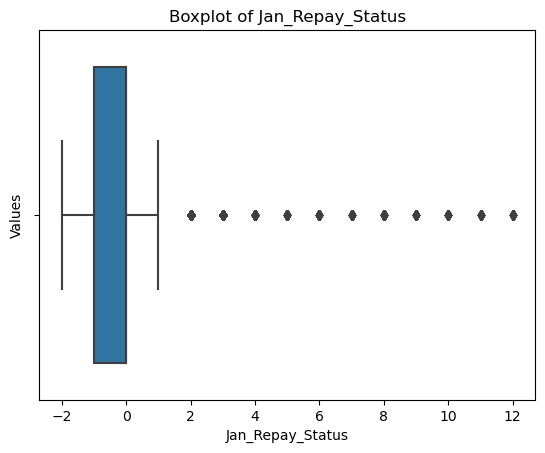

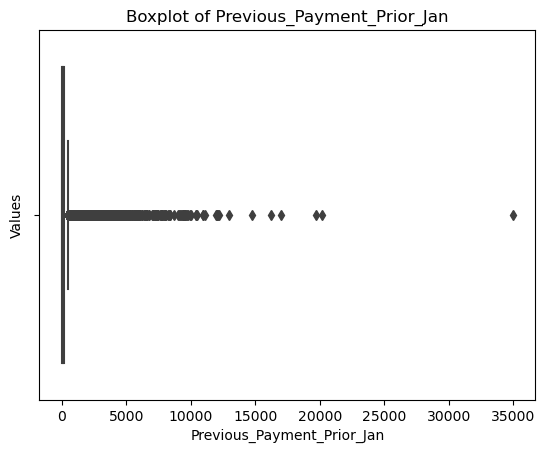

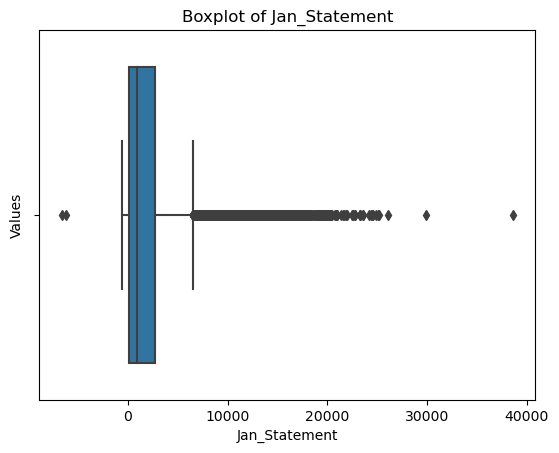

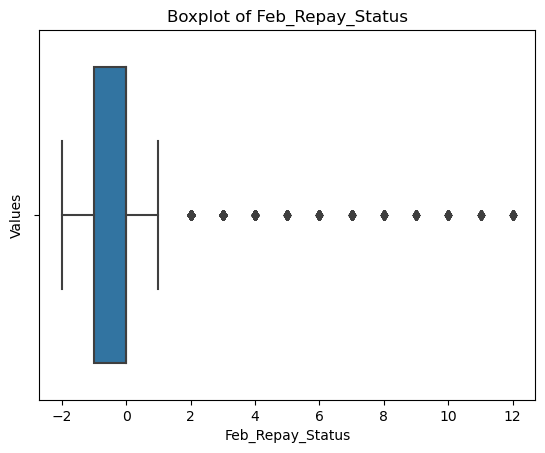

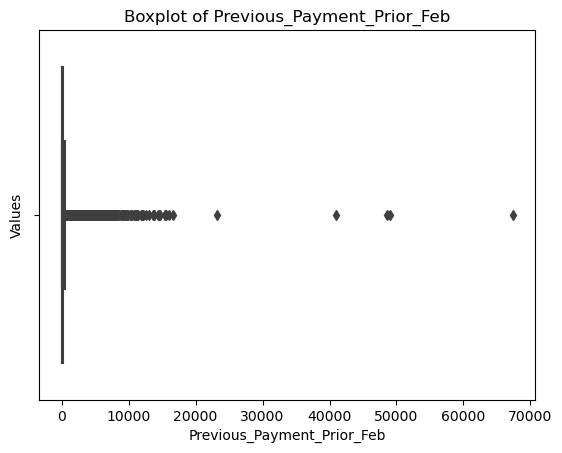

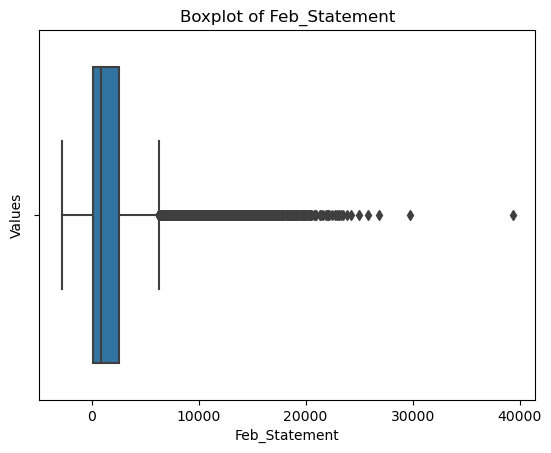

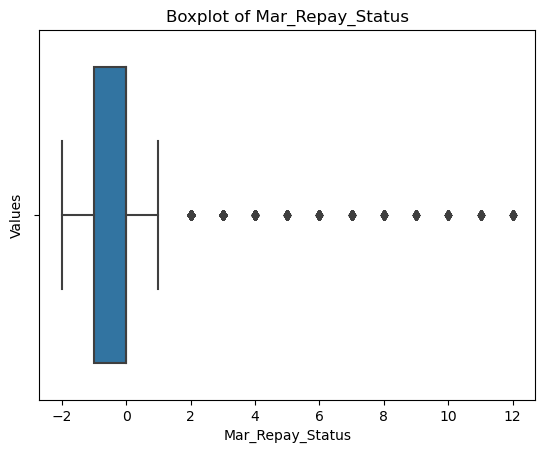

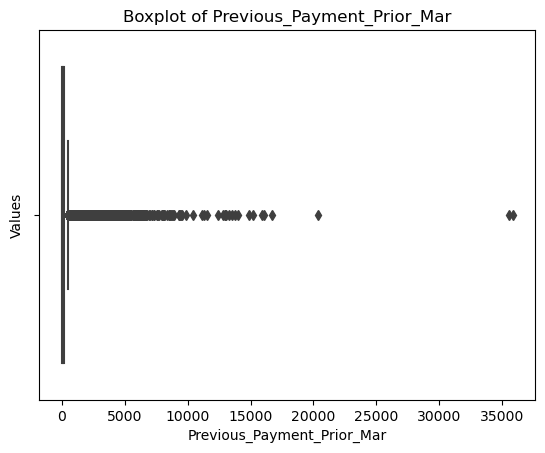

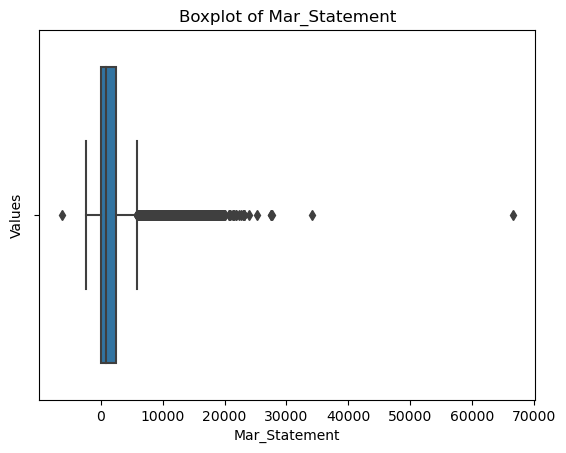

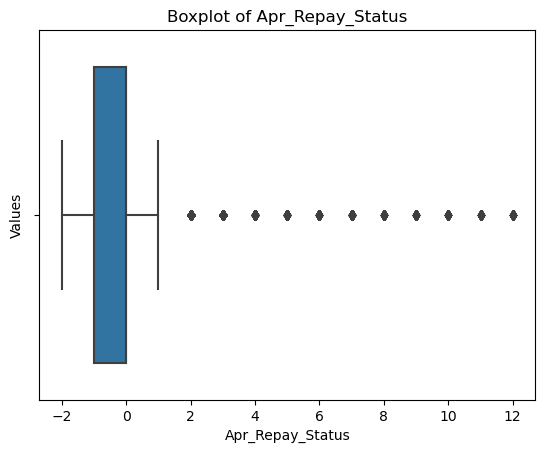

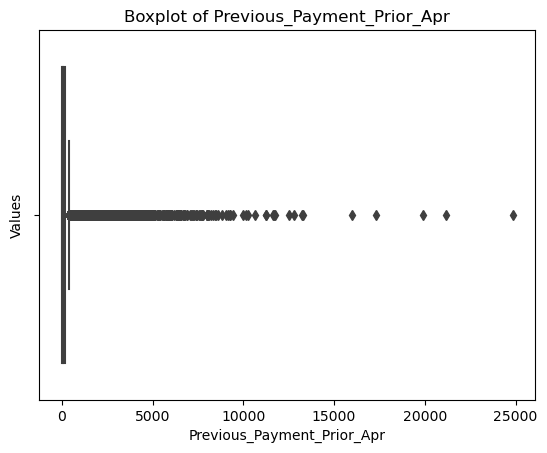

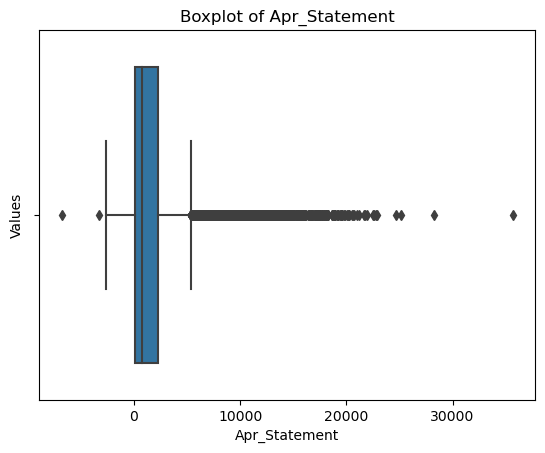

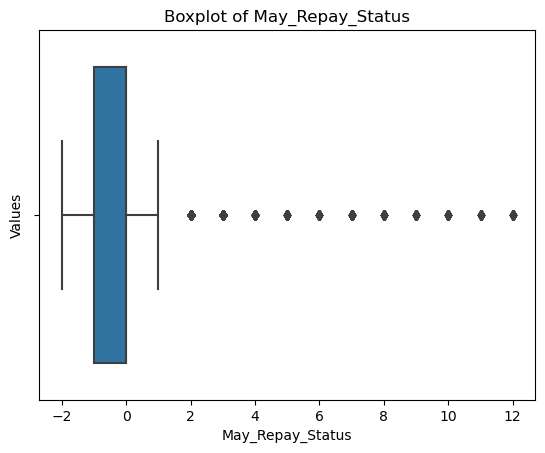

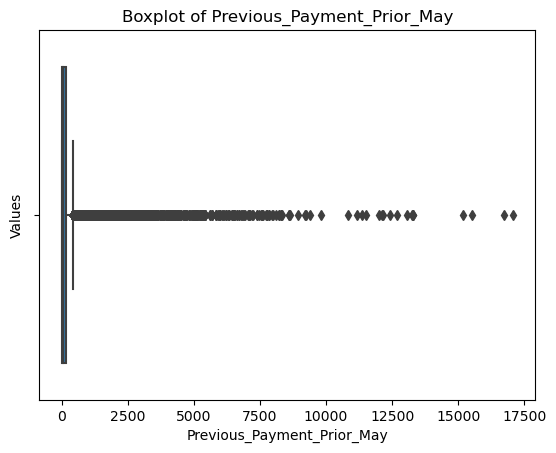

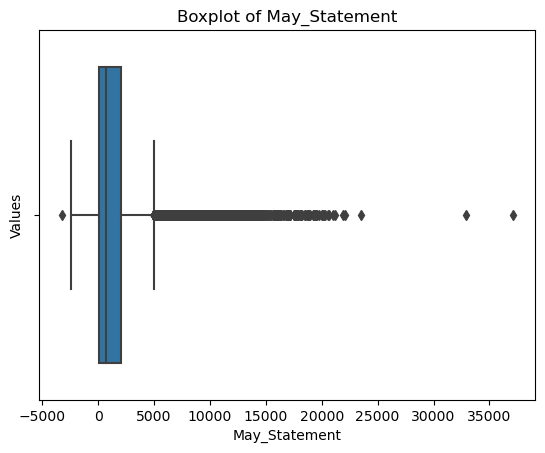

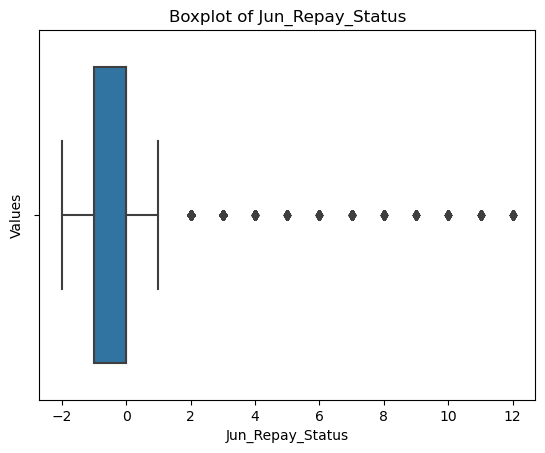

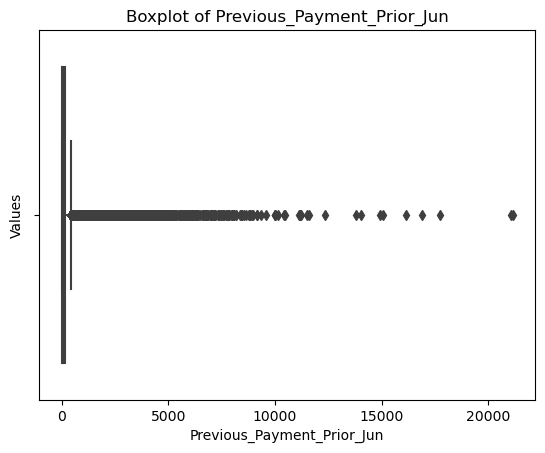

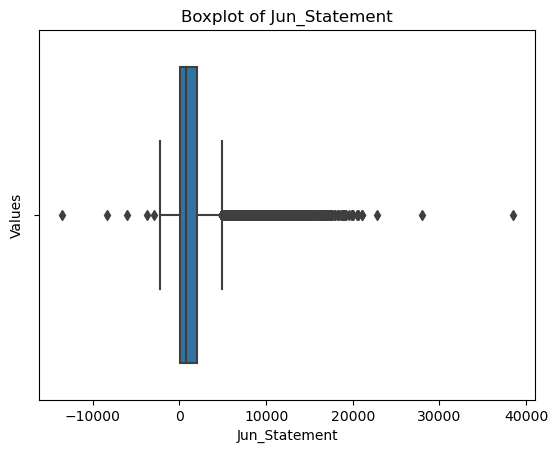

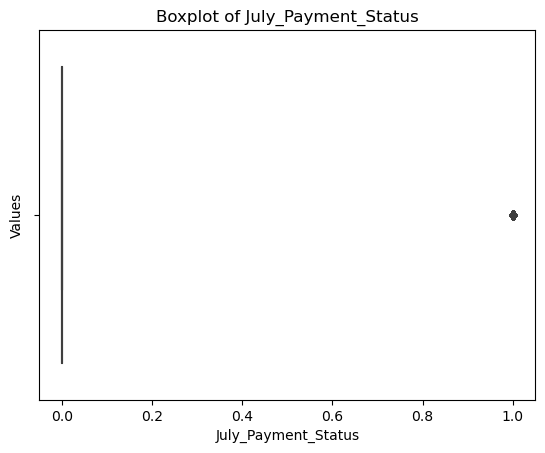

In [20]:
for i in df.columns:
    plt.figure()
    fig=sns.boxplot(x=df[i])
    plt.title(f'Boxplot of {i}') 
    plt.xlabel(i) 
    plt.ylabel('Values')
    plt.show()

# Data Analysis

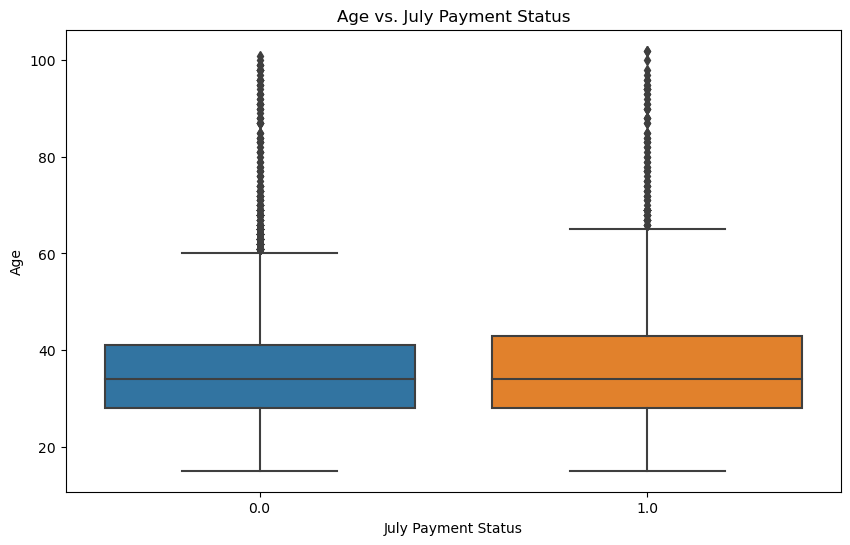

In [21]:
## Question 1: Does the age of the client have any correlation with the likelihood of defaulting on their July statement?
plt.figure(figsize=(10, 6))
sns.boxplot(x='July_Payment_Status', y='Age', data=df)
plt.title('Age vs. July Payment Status')
plt.xlabel('July Payment Status')
plt.ylabel('Age')
plt.show()

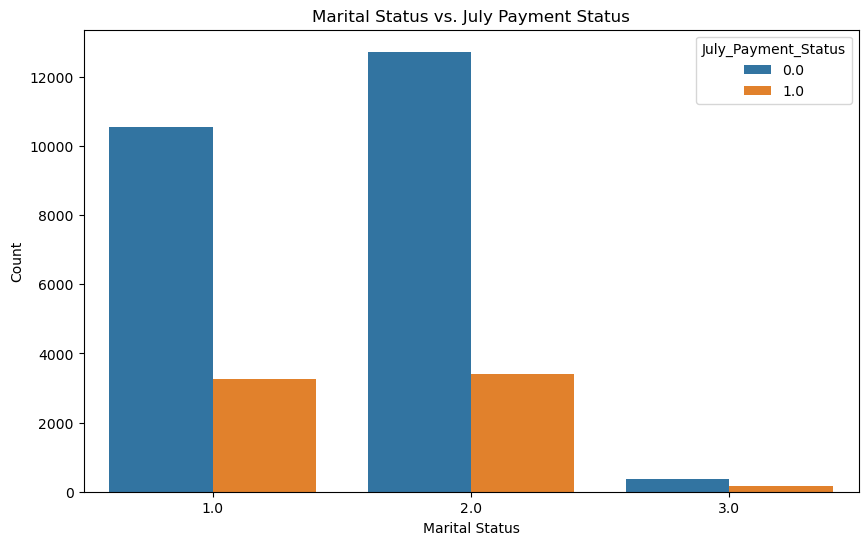

In [22]:
# Question 2: Is there a difference in default rates based on the marital status of the clients?
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', hue='July_Payment_Status', data=df)
plt.title('Marital Status vs. July Payment Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

In [23]:
# Question 3: How does the Repayment Status of of a client affect their probability of default?
df1= df[df['Jan_Repay_Status']>2]
print(f'Shape of Jan with Repay Status >2 {df1.shape}')
df2=df[df['Feb_Repay_Status']>2]
print(f'Shape of Feb with Repay Status >2 {df2.shape}')

df3=df[df['Mar_Repay_Status']>2]
print(f'Shape of Mar with Repay Status >2 {df3.shape}')

df4=df[df['Apr_Repay_Status']>2]
print(f'Shape of Apr with Repay Status >2 {df4.shape}')

df5=df[df['May_Repay_Status']>2]
print(f'Shape of Mar with Repay Status >2 {df5.shape}')

df6=df[df['Jun_Repay_Status']>2]
print(f'Shape of Jun with Repay Status >2 {df6.shape}')


Shape of Jan with Repay Status >2 (754, 24)
Shape of Feb with Repay Status >2 (792, 24)
Shape of Mar with Repay Status >2 (675, 24)
Shape of Apr with Repay Status >2 (670, 24)
Shape of Mar with Repay Status >2 (636, 24)
Shape of Jun with Repay Status >2 (611, 24)


In [24]:
import functools 
from functools import reduce
dataframes =[df2,df3,df4,df5,df6]
df_merged = reduce(lambda  left,right: pd.merge(left,right,
                                            how='right'), dataframes)

In [25]:
df_merged.shape #count of customer who didn't pay credit for more than 2 months 

(611, 24)

In [26]:
df_merged.head()

,Credit_Limit,Sex,Education,Marital_Status,Age,Jan_Repay_Status,Previous_Payment_Prior_Jan,Jan_Statement,Feb_Repay_Status,Previous_Payment_Prior_Feb,...,Apr_Repay_Status,Previous_Payment_Prior_Apr,Apr_Statement,May_Repay_Status,Previous_Payment_Prior_May,May_Statement,Jun_Repay_Status,Previous_Payment_Prior_Jun,Jun_Statement,July_Payment_Status
0,1300.0,2.0,2.0,3.0,18.0,4.0,120.0,1055.0,1.0,23.0,...,6.0,274.0,816.0,-1.0,0.0,4.0,11.0,147.0,770.0,0.0
1,6300.0,1.0,4.0,1.0,66.0,2.0,624.0,2513.0,9.0,1001.0,...,8.0,1165.0,1695.0,2.0,3317.0,5518.0,11.0,3303.0,3400.0,0.0
2,5700.0,1.0,1.0,1.0,57.0,2.0,0.0,4346.0,2.0,439.0,...,2.0,190.0,4545.0,2.0,77.0,4656.0,3.0,333.0,4633.0,1.0
3,4700.0,1.0,3.0,1.0,39.0,-1.0,56.0,488.0,2.0,0.0,...,0.0,200.0,695.0,0.0,0.0,883.0,3.0,0.0,857.0,1.0
4,3100.0,2.0,2.0,2.0,24.0,2.0,0.0,48.0,2.0,0.0,...,5.0,0.0,48.0,4.0,0.0,24.0,3.0,0.0,12.0,1.0


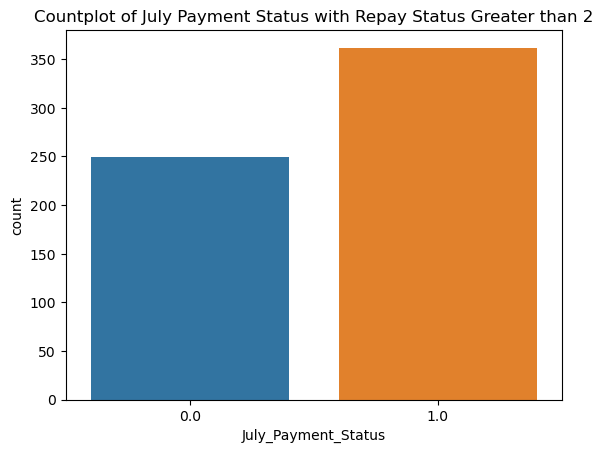

In [99]:
#countplot of data with repaystatus more than 2 months 
countplot_data(df_merged, df_merged.July_Payment_Status, 'Countplot of July Payment Status with Repay Status Greater than 2' )


The above diagram shows that if the repay status is greater than 2 : there is a high chance that the individal will default the credit. 


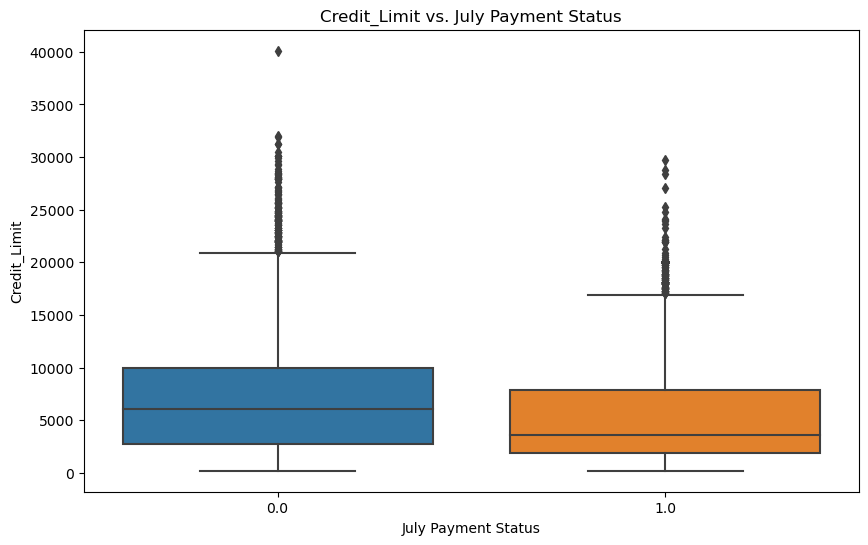

In [28]:
# box plot of the merged data for credit limit 
plt.figure(figsize=(10, 6))
sns.boxplot(x='July_Payment_Status', y='Credit_Limit', data=df)
plt.title('Credit_Limit vs. July Payment Status')
plt.xlabel('July Payment Status')
plt.ylabel('Credit_Limit')
plt.show()

From the above diagram it can be seen that , usually the people with low credit limit has defaulted their credit which means that bank has to some extent identified the individuals who might not pay the credit . Also , median is much less for the people who doesnot pay the credit. It means that people with less credit limit has the higher chances of not paying back their credit. 

<Axes: >

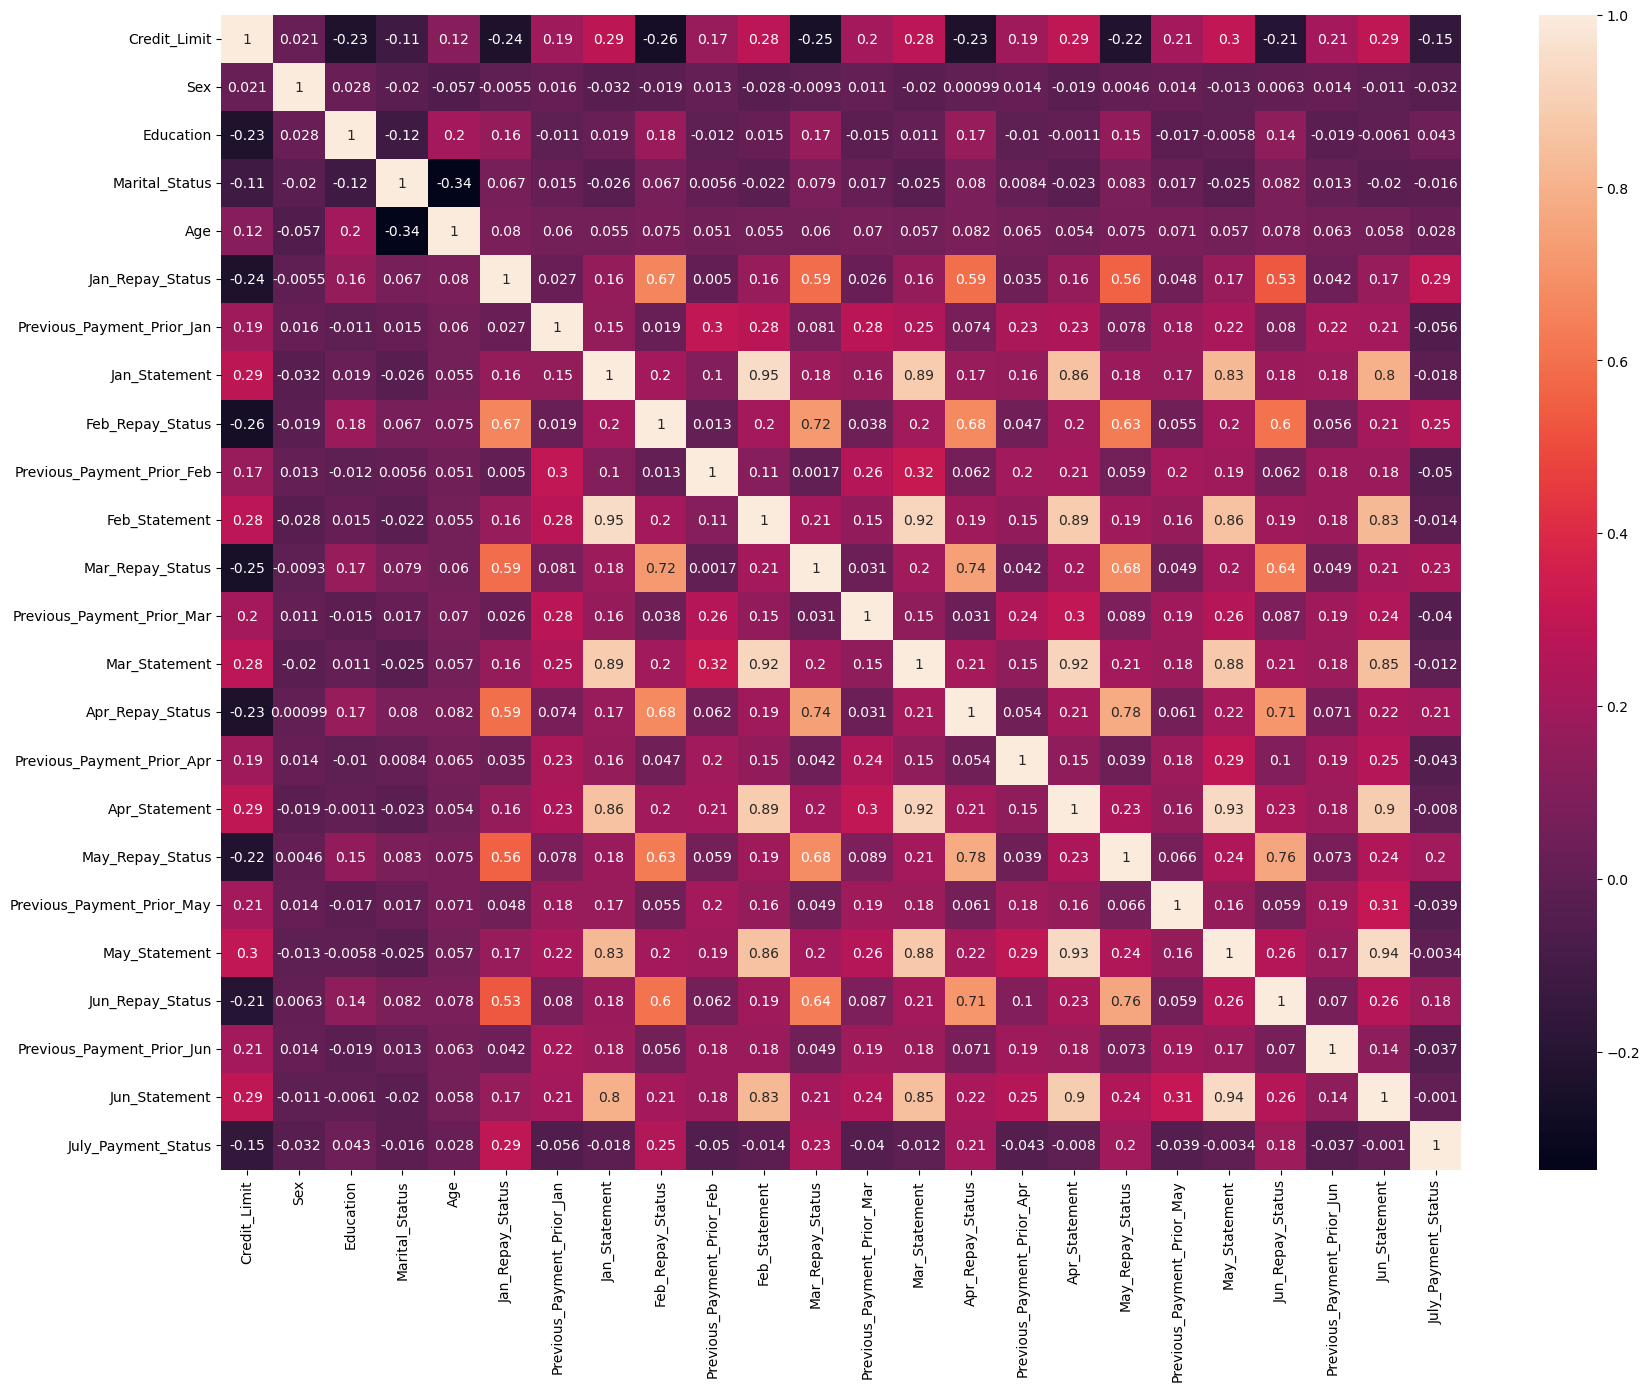

In [29]:
#coorelation 
plt.figure(figsize=(20,15))
df_corr = df.corr()
sns.heatmap(df_corr,annot=True)


# Log Transformation

In [30]:
sparse_columns= ['Credit_Limit','Age','Previous_Payment_Prior_Jan','Previous_Payment_Prior_Feb',
         'Previous_Payment_Prior_Mar','Previous_Payment_Prior_Apr',
         'Previous_Payment_Prior_May','Previous_Payment_Prior_Jun']
for val in sparse_columns:
    df[val] = np.log(df[val] + 1)
    

# Standardization

In [31]:
std_columns= ['Jan_Statement','Feb_Statement','Mar_Statement','Apr_Statement','May_Statement','Jun_Statement']
scaler = StandardScaler()

for val in std_columns:
    df[val] = scaler.fit_transform(df[[val]])

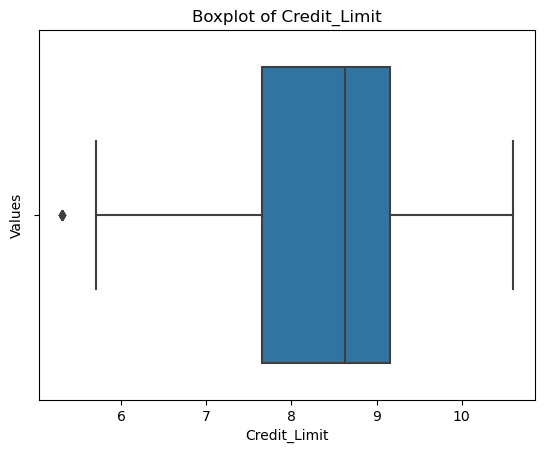

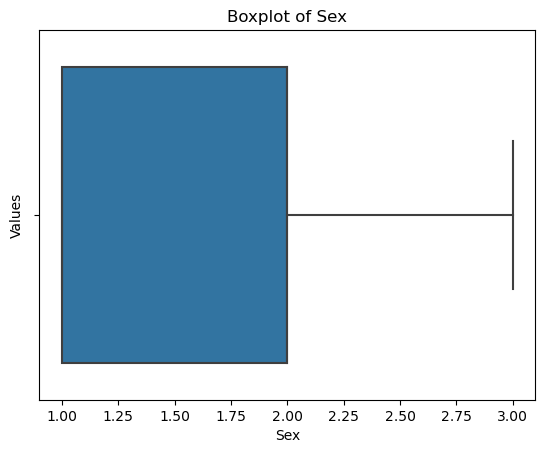

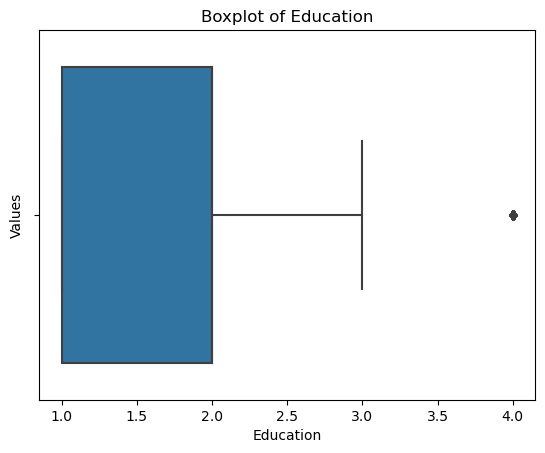

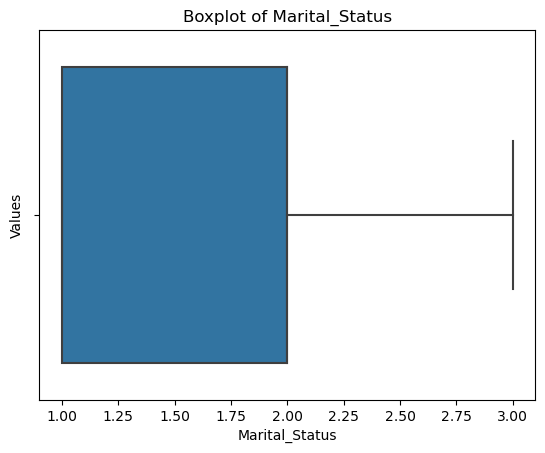

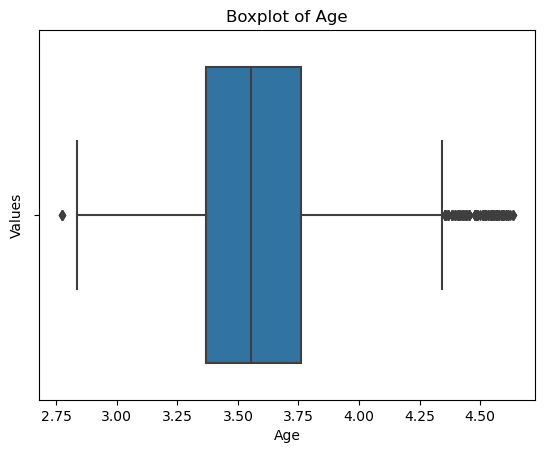

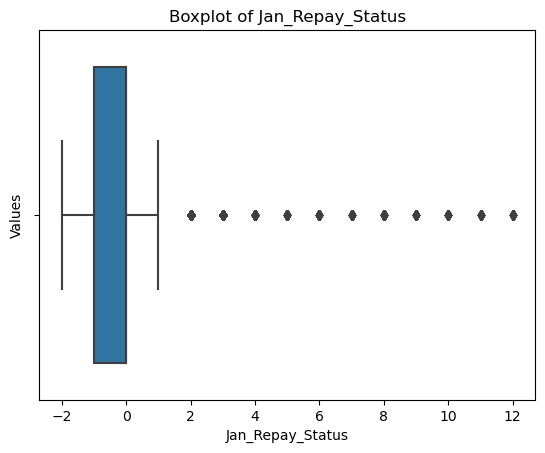

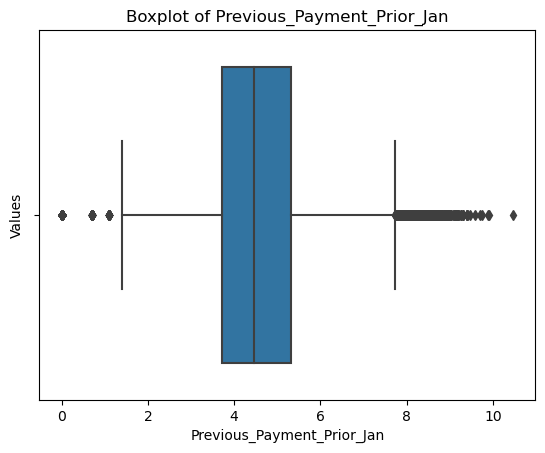

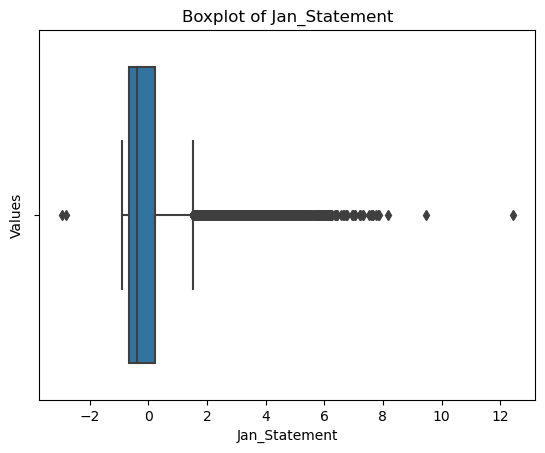

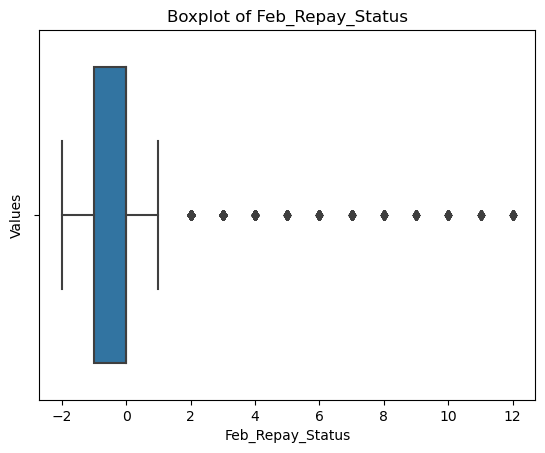

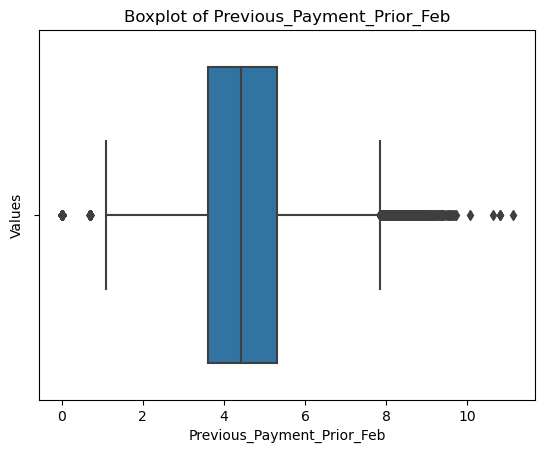

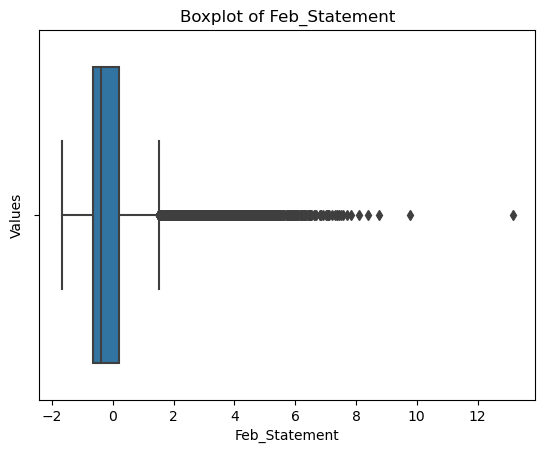

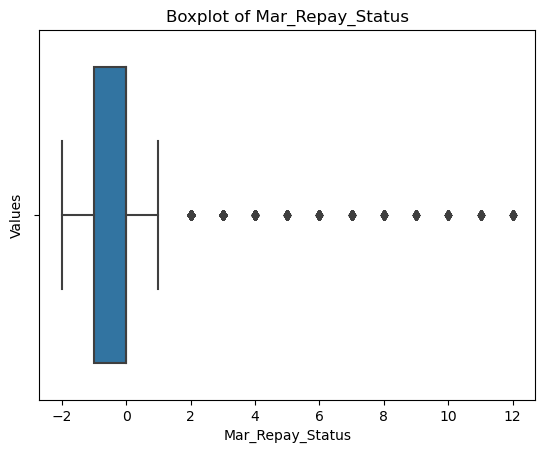

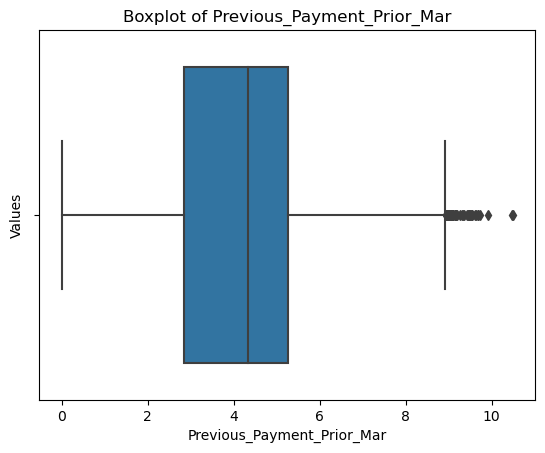

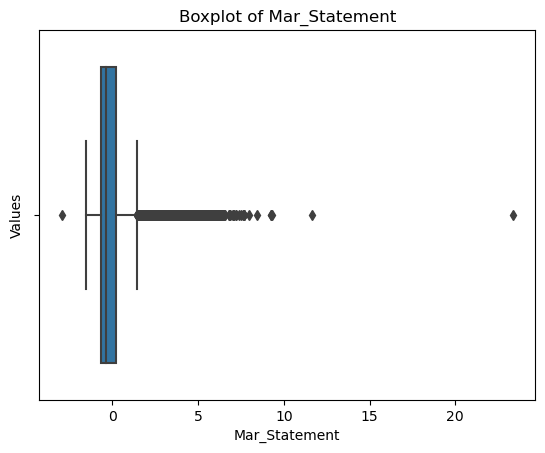

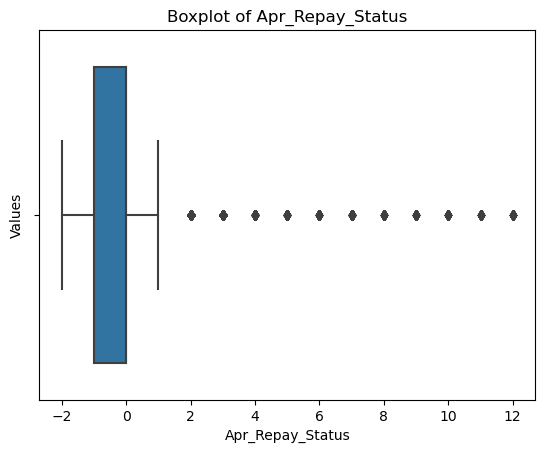

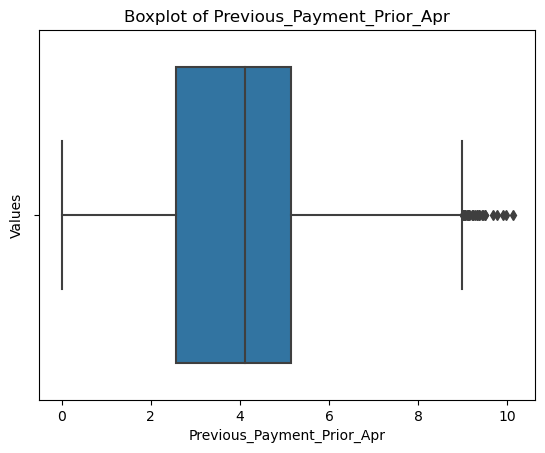

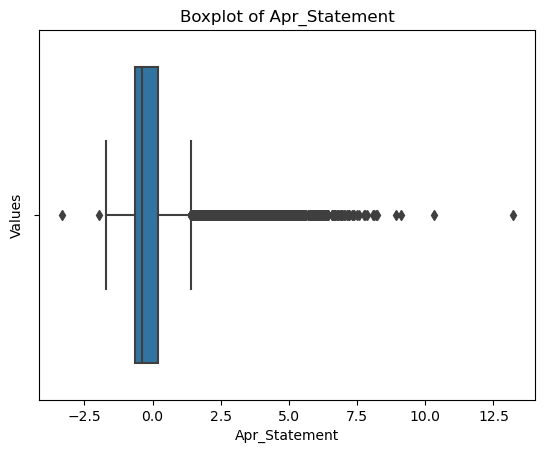

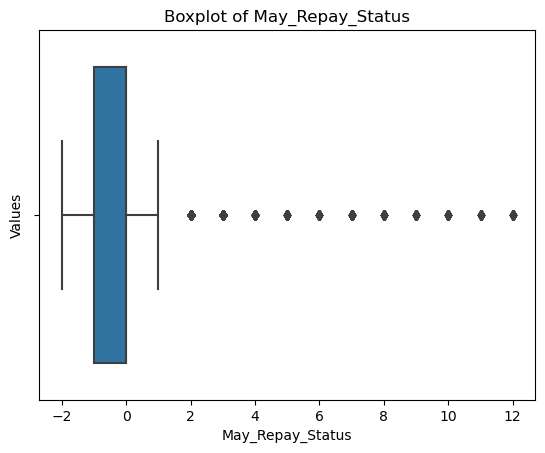

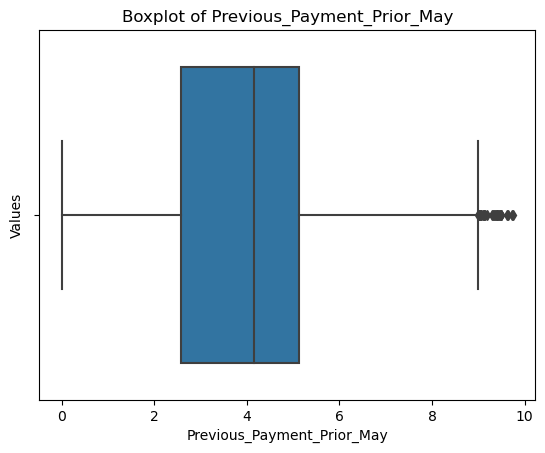

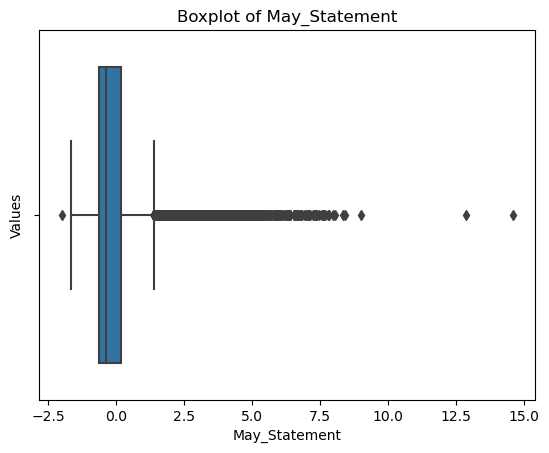

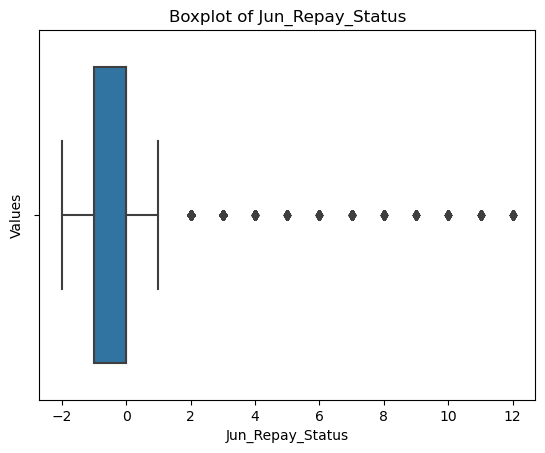

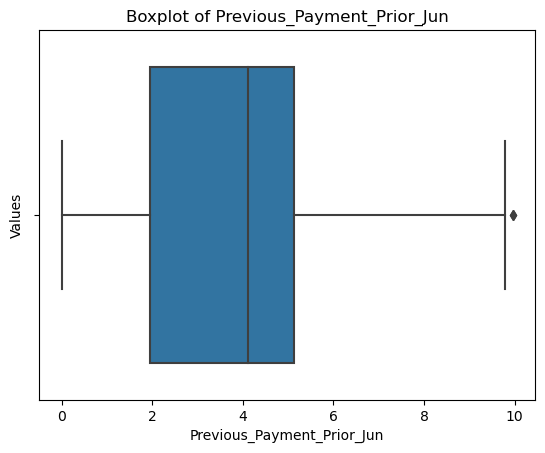

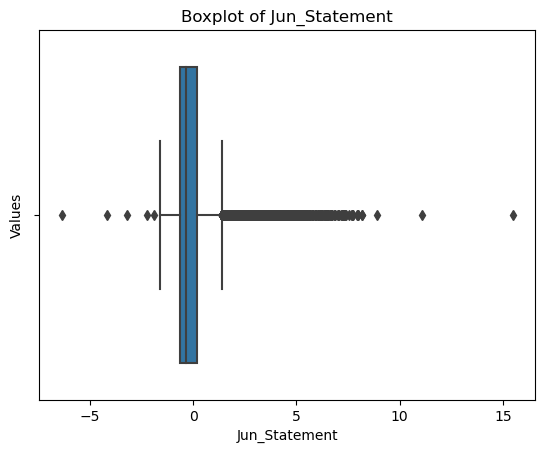

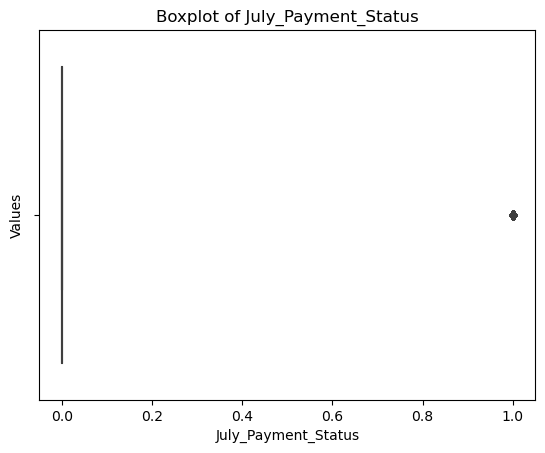

In [32]:
#boxplot after log transformtion
for i in df.columns:
    plt.figure()
    fig=sns.boxplot(x=df[i])
    plt.title(f'Boxplot of {i}') 
    plt.xlabel(i) 
    plt.ylabel('Values')
    plt.show()

# Splitting Data Into training and test data

In [33]:
X=df.drop('July_Payment_Status',axis=1)
y=df['July_Payment_Status']

In [34]:
X.shape


(30504, 23)

In [35]:
y.shape

(30504,)

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42,stratify =y)

In [37]:
df.isna().sum()

Credit_Limit                  0
Sex                           0
Education                     0
Marital_Status                0
Age                           0
Jan_Repay_Status              0
Previous_Payment_Prior_Jan    0
Jan_Statement                 0
Feb_Repay_Status              0
Previous_Payment_Prior_Feb    0
Feb_Statement                 0
Mar_Repay_Status              0
Previous_Payment_Prior_Mar    0
Mar_Statement                 0
Apr_Repay_Status              0
Previous_Payment_Prior_Apr    0
Apr_Statement                 0
May_Repay_Status              0
Previous_Payment_Prior_May    0
May_Statement                 0
Jun_Repay_Status              0
Previous_Payment_Prior_Jun    0
Jun_Statement                 0
July_Payment_Status           0
dtype: int64

# Performance Measure

In [38]:
def display_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    disp = ConfusionMatrixDisplay(cm, display_labels=classes)
    disp.plot(xticks_rotation='vertical',cmap=plt.cm.Blues)
    plt.show()

In [39]:
def roc_auc_plot(y_test,y_pred,model):

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model}')
    plt.legend()
    plt.show()

In [40]:
def calculate_scores(model):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    print("accuracy for Training Set:", round(accuracy_score(y_train, pred_train)*100,2), "\b%")
    print("Classification Report for Training Set:\n\n", classification_report(y_train, pred_train))
    display_confusion_matrix(y_train, pred_train, model.classes_)
    #roc_curve(y_train,pred_train)
    print()
    print("accuracy for Test Set:", round(accuracy_score(y_test, pred_test)*100,2), "\b%")
    print("Classification Report for Test Set:\n\n", classification_report(y_test, pred_test))
    display_confusion_matrix(y_test, pred_test, model.classes_)
    roc_auc_plot(y_test,y_pred_proba,model)

# Logistic Regression

accuracy for Training Set: 79.33 %
Classification Report for Training Set:

               precision    recall  f1-score   support

         0.0       0.81      0.97      0.88     18921
         1.0       0.63      0.19      0.29      5482

    accuracy                           0.79     24403
   macro avg       0.72      0.58      0.59     24403
weighted avg       0.77      0.79      0.75     24403



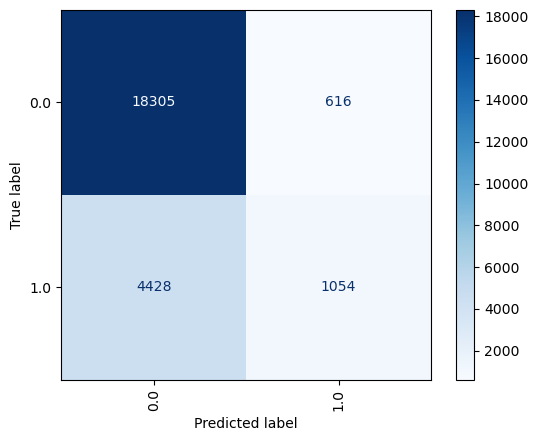


accuracy for Test Set: 79.61 %
Classification Report for Test Set:

               precision    recall  f1-score   support

         0.0       0.81      0.97      0.88      4731
         1.0       0.64      0.21      0.31      1370

    accuracy                           0.80      6101
   macro avg       0.73      0.59      0.60      6101
weighted avg       0.77      0.80      0.75      6101



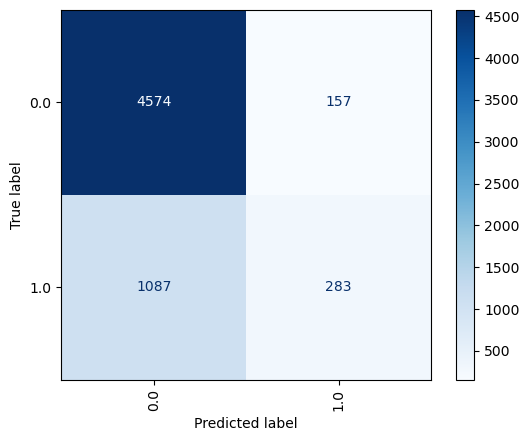

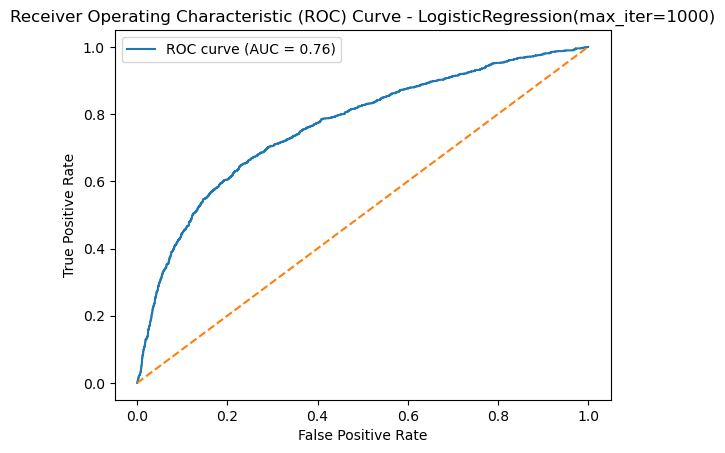

In [42]:
lr_classifier= LogisticRegression(max_iter=1000, penalty='l2', C=1.0) 
lr_model = lr_classifier.fit(X_train, y_train)
calculate_scores(lr_model)

# Random Forest Classifier

accuracy for Training Set: 99.97 %
Classification Report for Training Set:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18921
         1.0       1.00      1.00      1.00      5482

    accuracy                           1.00     24403
   macro avg       1.00      1.00      1.00     24403
weighted avg       1.00      1.00      1.00     24403



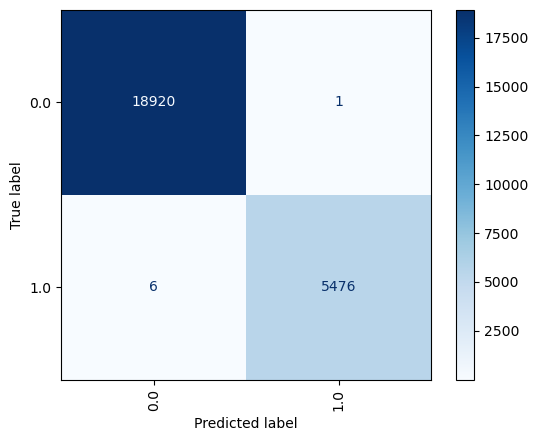


accuracy for Test Set: 81.61 %
Classification Report for Test Set:

               precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      4731
         1.0       0.66      0.38      0.48      1370

    accuracy                           0.82      6101
   macro avg       0.75      0.66      0.69      6101
weighted avg       0.80      0.82      0.80      6101



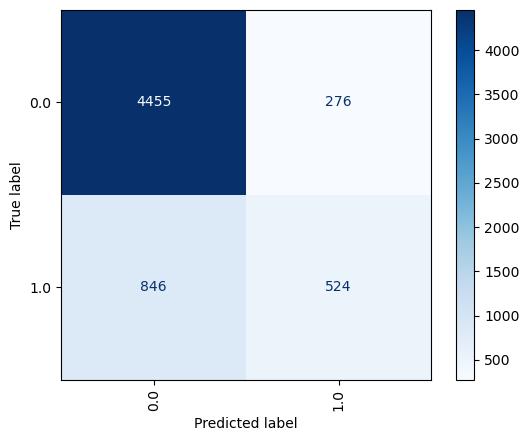

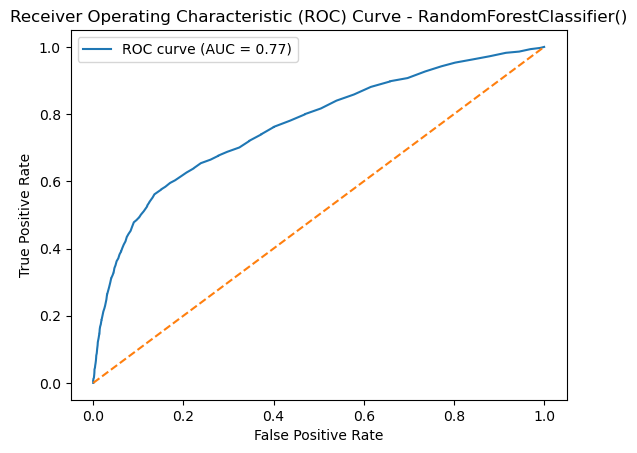

In [43]:
classifier= RandomForestClassifier()
rfc_model = classifier.fit(X_train, y_train)
calculate_scores(rfc_model)


# XGBoost

accuracy for Training Set: 88.89 %
Classification Report for Training Set:

               precision    recall  f1-score   support

         0.0       0.89      0.98      0.93     18921
         1.0       0.89      0.58      0.70      5482

    accuracy                           0.89     24403
   macro avg       0.89      0.78      0.82     24403
weighted avg       0.89      0.89      0.88     24403



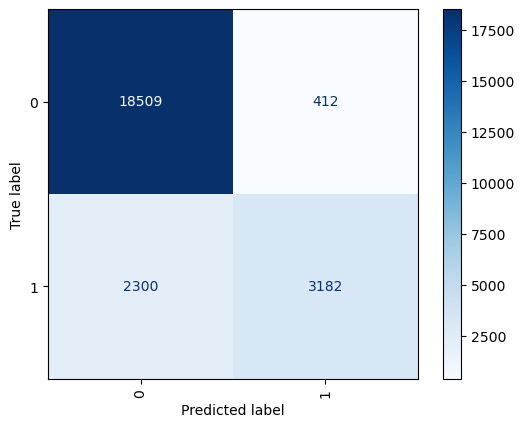


accuracy for Test Set: 81.36 %
Classification Report for Test Set:

               precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      4731
         1.0       0.64      0.38      0.48      1370

    accuracy                           0.81      6101
   macro avg       0.74      0.66      0.68      6101
weighted avg       0.80      0.81      0.80      6101



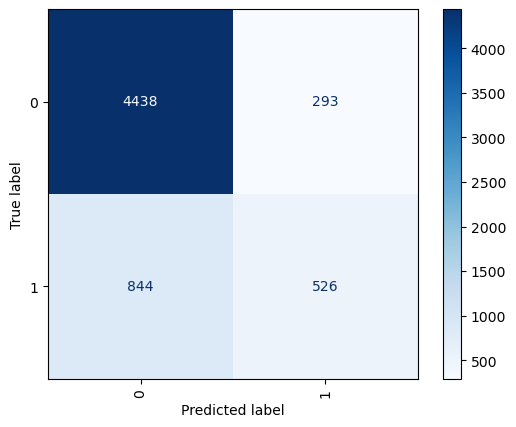

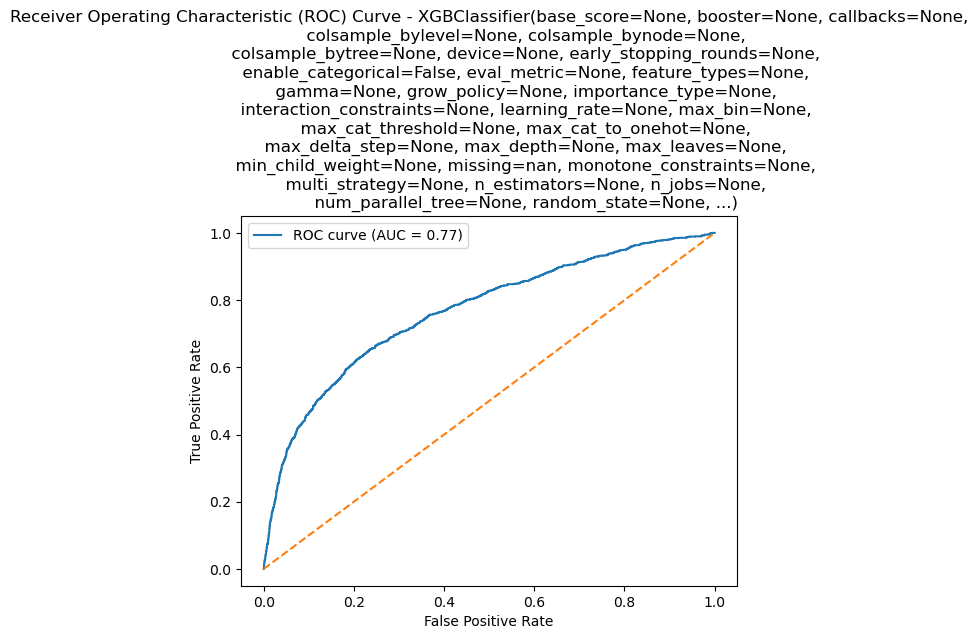

In [44]:
xgboost_classifier=xgb.XGBClassifier()
xgboost_model = xgboost_classifier.fit(X_train, y_train)
calculate_scores(xgboost_model)

# Gradient Boosting Classifier

accuracy for Training Set: 82.47 %
Classification Report for Training Set:

               precision    recall  f1-score   support

         0.0       0.84      0.95      0.89     18921
         1.0       0.70      0.38      0.50      5482

    accuracy                           0.82     24403
   macro avg       0.77      0.67      0.69     24403
weighted avg       0.81      0.82      0.80     24403



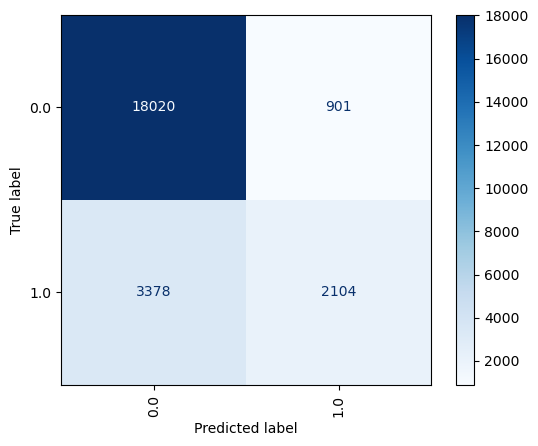


accuracy for Test Set: 81.84 %
Classification Report for Test Set:

               precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      4731
         1.0       0.67      0.38      0.49      1370

    accuracy                           0.82      6101
   macro avg       0.75      0.66      0.69      6101
weighted avg       0.80      0.82      0.80      6101



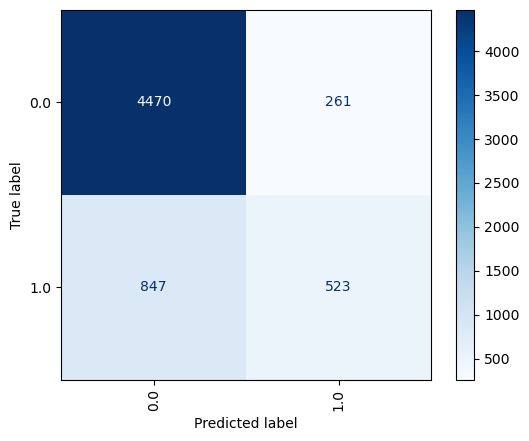

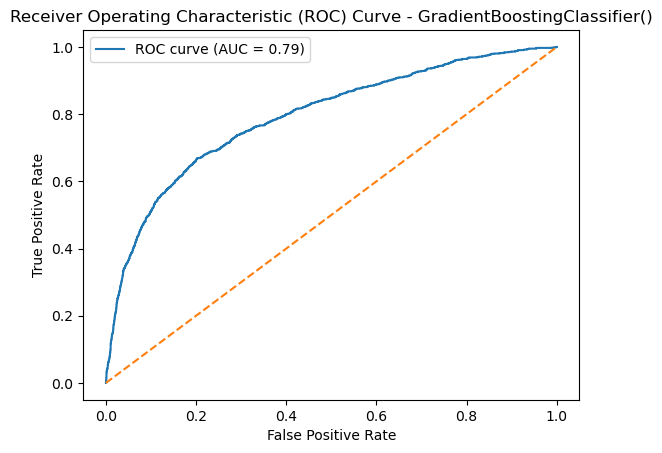

In [45]:
#best so far highest is 81
gb_classifier=GradientBoostingClassifier()
gb_model = gb_classifier.fit(X_train, y_train)
calculate_scores(gb_model)

# using Smote to handle Class Imbalance

In [46]:
pip install imblearn
pip install --upgrade scikit-learn
!pip uninstall imblearn --yes
!pip install scikit-learn==1.2.2
!pip install imblearn



DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


# SMOTETomek for OverSampling 

A method called SMOTETomek,combines both oversampling (using SMOTE for the minority class) and undersampling (using Tomek links to remove Tomek pairs). This combined approach aims to create a more balanced dataset.

In [51]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0.0: 18921, 1.0: 5482})
After Counter({0.0: 18661, 1.0: 18661})


# Performance After balanced data

accuracy for Training Set: 72.47 %
Classification Report for Training Set:

               precision    recall  f1-score   support

         0.0       0.88      0.75      0.81     18921
         1.0       0.43      0.64      0.51      5482

    accuracy                           0.72     24403
   macro avg       0.65      0.69      0.66     24403
weighted avg       0.78      0.72      0.74     24403



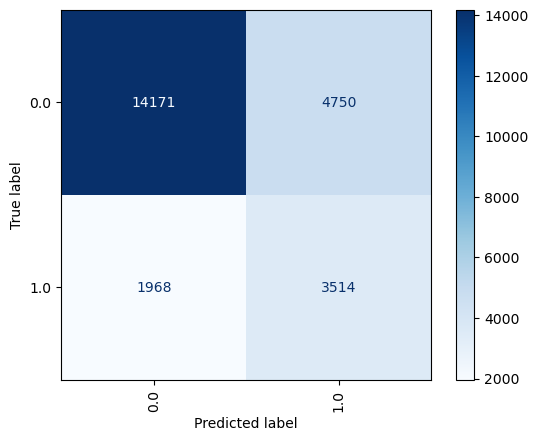


accuracy for Test Set: 72.61 %
Classification Report for Test Set:

               precision    recall  f1-score   support

         0.0       0.88      0.74      0.81      4731
         1.0       0.43      0.67      0.52      1370

    accuracy                           0.73      6101
   macro avg       0.66      0.70      0.66      6101
weighted avg       0.78      0.73      0.74      6101



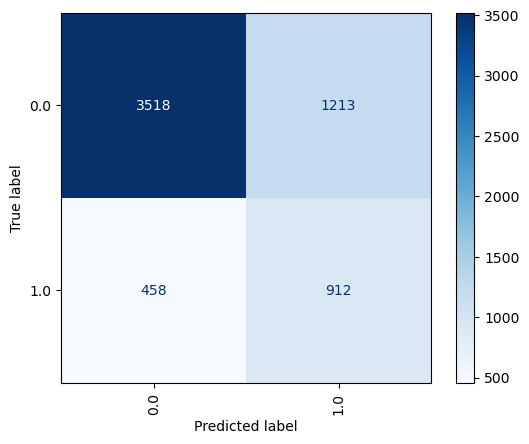

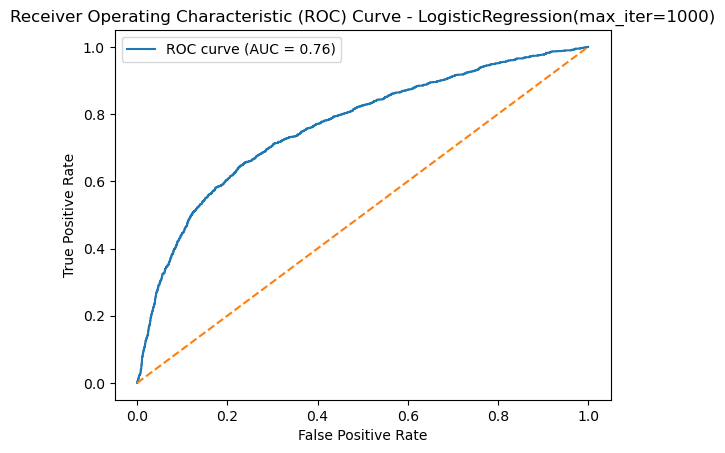

In [52]:
lr_classifier= LogisticRegression(max_iter=1000)
lr_model_smtom = lr_classifier.fit(X_train_smtom, y_train_smtom)
calculate_scores(lr_model_smtom)

# Random Forest Classifier

accuracy for Training Set: 99.24 %
Classification Report for Training Set:

               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     18921
         1.0       0.98      0.98      0.98      5482

    accuracy                           0.99     24403
   macro avg       0.99      0.99      0.99     24403
weighted avg       0.99      0.99      0.99     24403



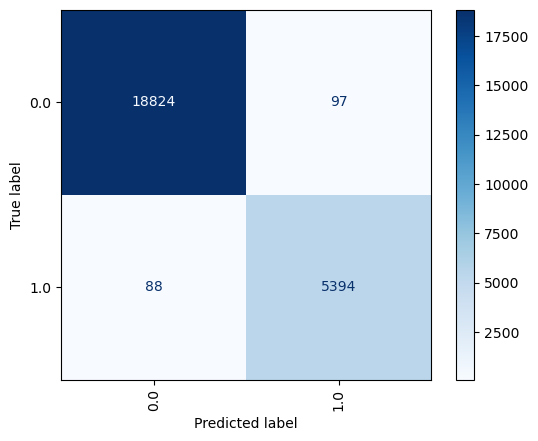


accuracy for Test Set: 80.86 %
Classification Report for Test Set:

               precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      4731
         1.0       0.59      0.48      0.53      1370

    accuracy                           0.81      6101
   macro avg       0.72      0.69      0.70      6101
weighted avg       0.80      0.81      0.80      6101



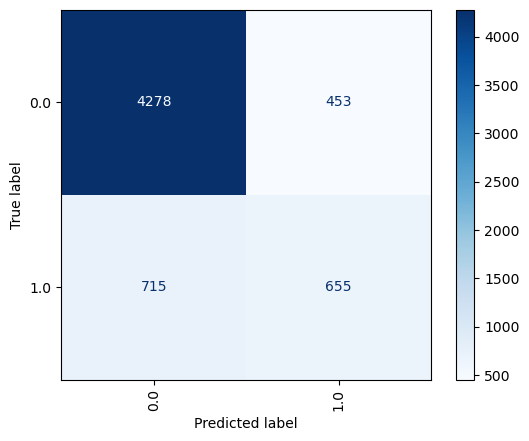

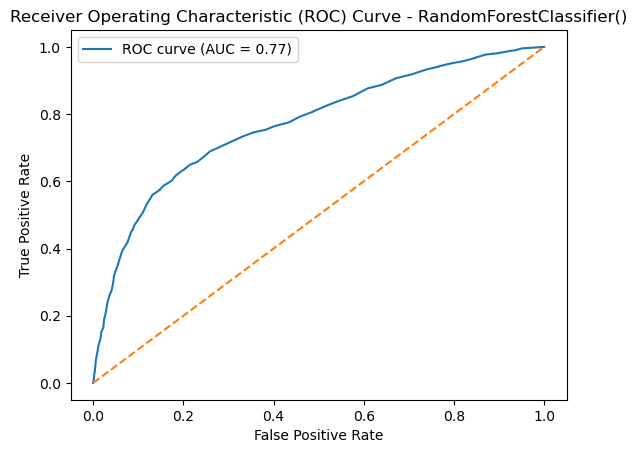

In [53]:
classifier= RandomForestClassifier()
rfc_model_smtom = classifier.fit(X_train_smtom, y_train_smtom)
calculate_scores(rfc_model_smtom)

# XGBoost Classifier

accuracy for Training Set: 87.26 %
Classification Report for Training Set:

               precision    recall  f1-score   support

         0.0       0.89      0.95      0.92     18921
         1.0       0.79      0.59      0.68      5482

    accuracy                           0.87     24403
   macro avg       0.84      0.77      0.80     24403
weighted avg       0.87      0.87      0.87     24403



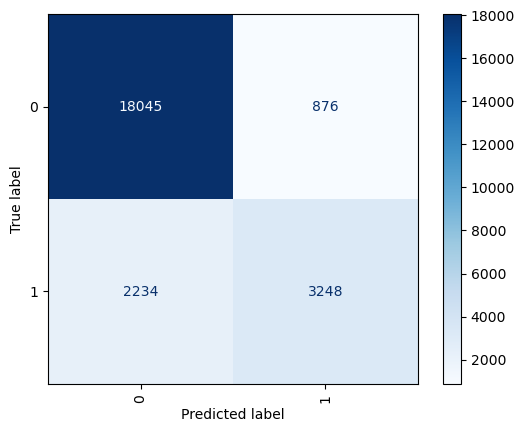


accuracy for Test Set: 80.36 %
Classification Report for Test Set:

               precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      4731
         1.0       0.59      0.42      0.49      1370

    accuracy                           0.80      6101
   macro avg       0.72      0.67      0.68      6101
weighted avg       0.79      0.80      0.79      6101



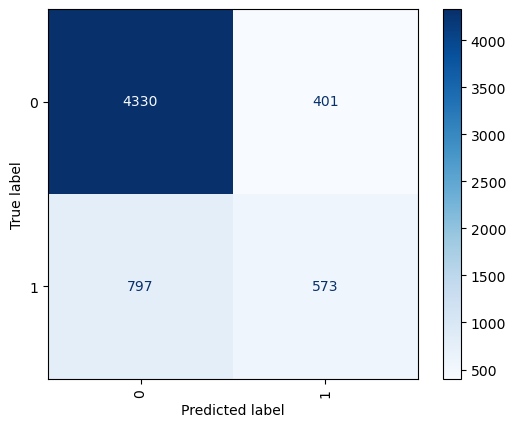

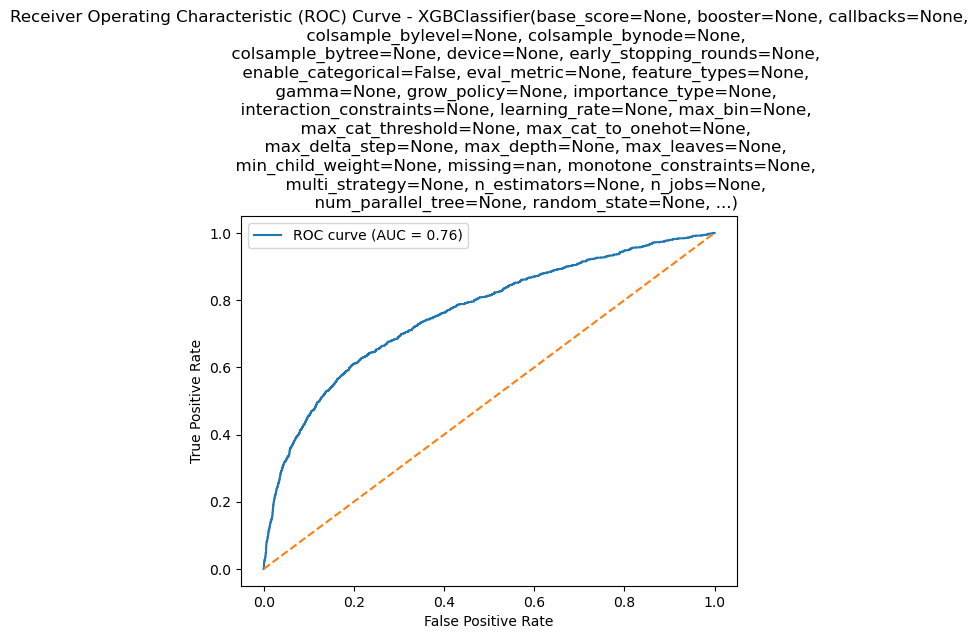

In [54]:
xgboost_classifier=xgb.XGBClassifier()
xgboost_model_smtom = xgboost_classifier.fit(X_train_smtom, y_train_smtom)
calculate_scores(xgboost_model_smtom)

# Gradient Boost Classifier

accuracy for Training Set: 80.95 %
Classification Report for Training Set:

               precision    recall  f1-score   support

         0.0       0.86      0.90      0.88     18921
         1.0       0.59      0.48      0.53      5482

    accuracy                           0.81     24403
   macro avg       0.73      0.69      0.71     24403
weighted avg       0.80      0.81      0.80     24403



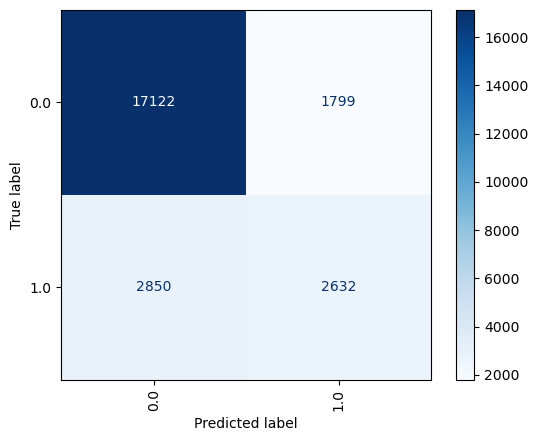


accuracy for Test Set: 80.94 %
Classification Report for Test Set:

               precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      4731
         1.0       0.59      0.50      0.54      1370

    accuracy                           0.81      6101
   macro avg       0.73      0.70      0.71      6101
weighted avg       0.80      0.81      0.80      6101



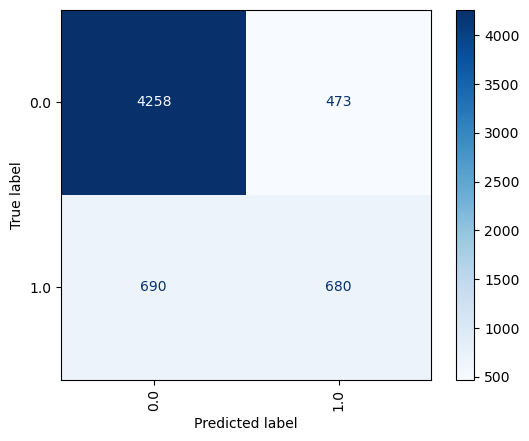

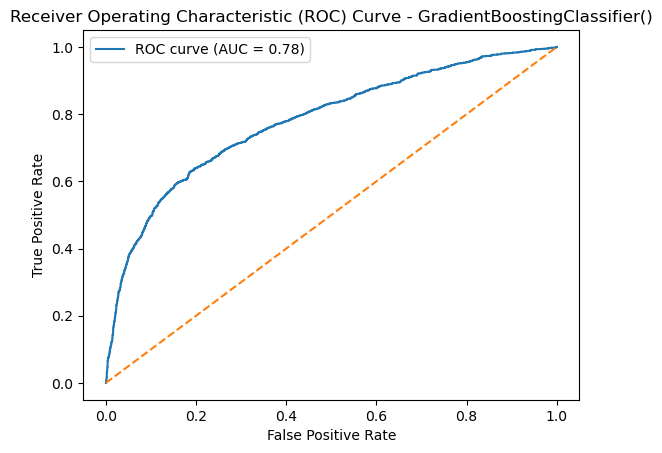

In [55]:
gb_classifier=GradientBoostingClassifier()
gb_model_smtom = gb_classifier.fit(X_train_smtom, y_train_smtom)
calculate_scores(gb_model_smtom)

# ADASYN Technique(For Class Imbalance)

In [56]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({0.0: 18921, 1.0: 5482})
After Counter({0.0: 18921, 1.0: 18633})


accuracy for Training Set: 81.26 %
Classification Report for Training Set:

               precision    recall  f1-score   support

         0.0       0.86      0.91      0.88     18921
         1.0       0.61      0.47      0.53      5482

    accuracy                           0.81     24403
   macro avg       0.73      0.69      0.71     24403
weighted avg       0.80      0.81      0.80     24403



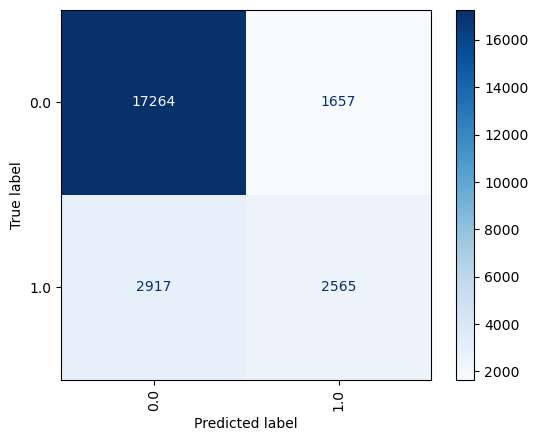


accuracy for Test Set: 81.0 %
Classification Report for Test Set:

               precision    recall  f1-score   support

         0.0       0.86      0.91      0.88      4731
         1.0       0.60      0.48      0.53      1370

    accuracy                           0.81      6101
   macro avg       0.73      0.69      0.71      6101
weighted avg       0.80      0.81      0.80      6101



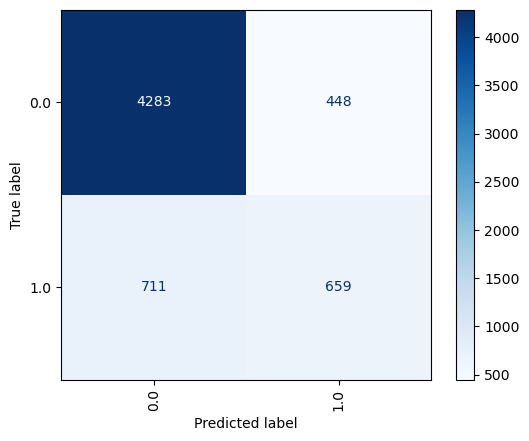

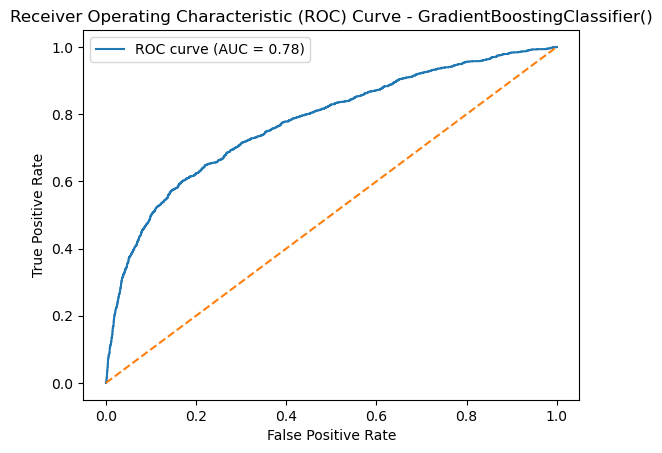

In [57]:
#this is good so far 
gb_classifier=GradientBoostingClassifier()
gb_model_ada = gb_classifier.fit(X_train_ada, y_train_ada)
calculate_scores(gb_model_ada)

accuracy for Training Set: 99.98 %
Classification Report for Training Set:

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18921
         1.0       1.00      1.00      1.00      5482

    accuracy                           1.00     24403
   macro avg       1.00      1.00      1.00     24403
weighted avg       1.00      1.00      1.00     24403



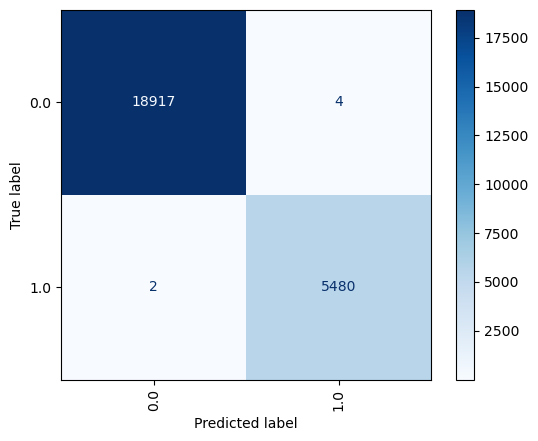


accuracy for Test Set: 80.25 %
Classification Report for Test Set:

               precision    recall  f1-score   support

         0.0       0.85      0.90      0.88      4731
         1.0       0.57      0.46      0.51      1370

    accuracy                           0.80      6101
   macro avg       0.71      0.68      0.69      6101
weighted avg       0.79      0.80      0.79      6101



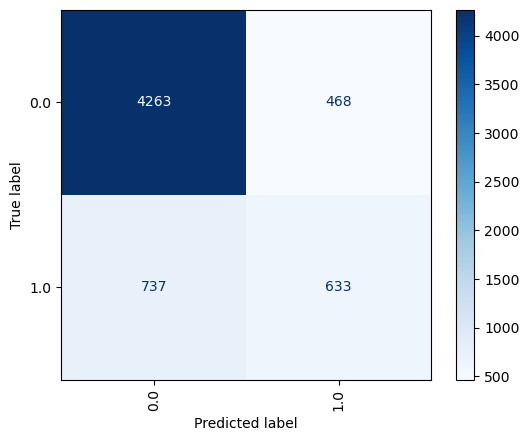

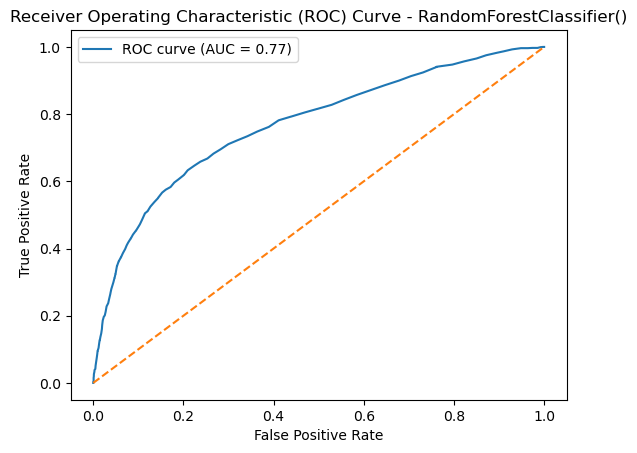

In [58]:
classifier= RandomForestClassifier()
rfc_model_ada = classifier.fit(X_train_ada, y_train_ada)
calculate_scores(rfc_model_ada)

accuracy for Training Set: 69.69 %
Classification Report for Training Set:

               precision    recall  f1-score   support

         0.0       0.88      0.70      0.78     18921
         1.0       0.40      0.68      0.50      5482

    accuracy                           0.70     24403
   macro avg       0.64      0.69      0.64     24403
weighted avg       0.77      0.70      0.72     24403



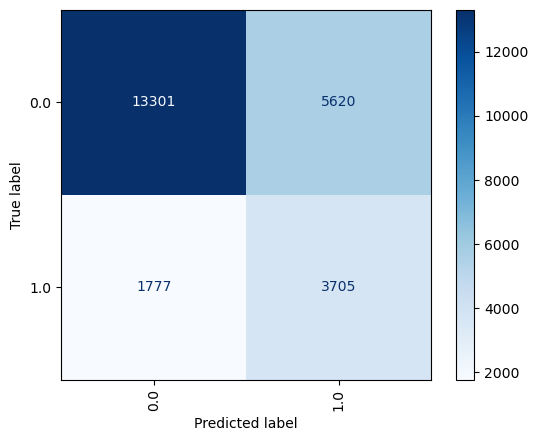


accuracy for Test Set: 70.05 %
Classification Report for Test Set:

               precision    recall  f1-score   support

         0.0       0.89      0.70      0.78      4731
         1.0       0.40      0.70      0.51      1370

    accuracy                           0.70      6101
   macro avg       0.65      0.70      0.65      6101
weighted avg       0.78      0.70      0.72      6101



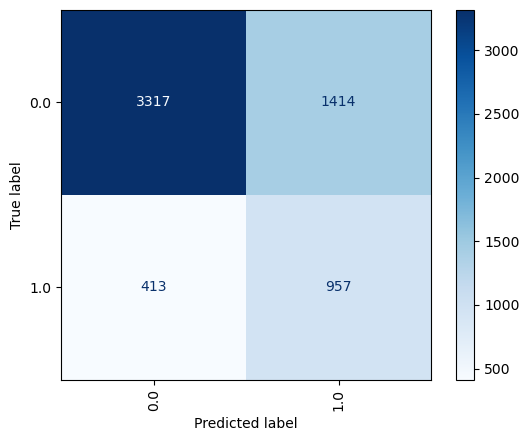

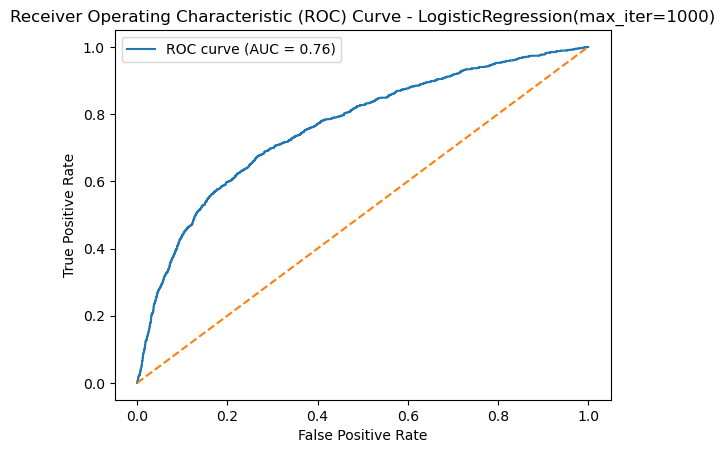

In [74]:
lr_classifier= LogisticRegression(max_iter=1000, C=1.0) 
lr_model_ada = lr_classifier.fit(X_train_ada, y_train_ada)
calculate_scores(lr_model_ada)

# Feature Importance

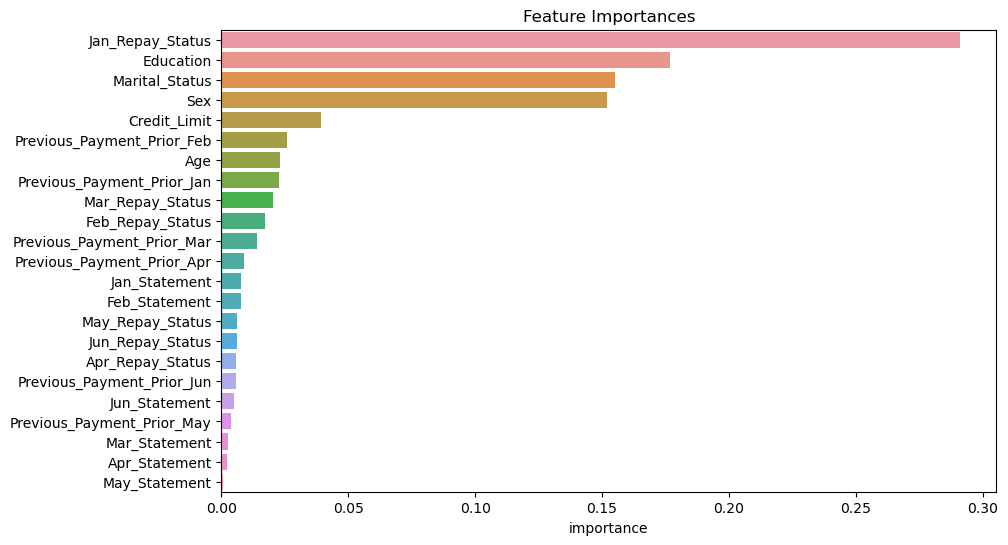

In [60]:
# Feature importance
feature_importances = pd.DataFrame(gb_model_ada.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Feature Importances-ADASYN')
plt.show()

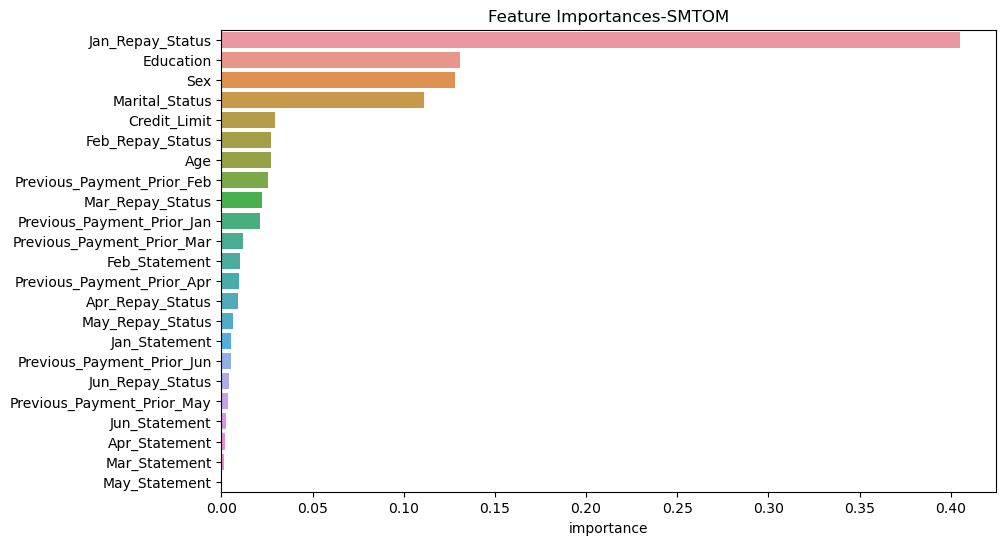

In [61]:
# Feature importance
feature_importances = pd.DataFrame(gb_model_smtom.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Feature Importances-SMTOM')
plt.show()

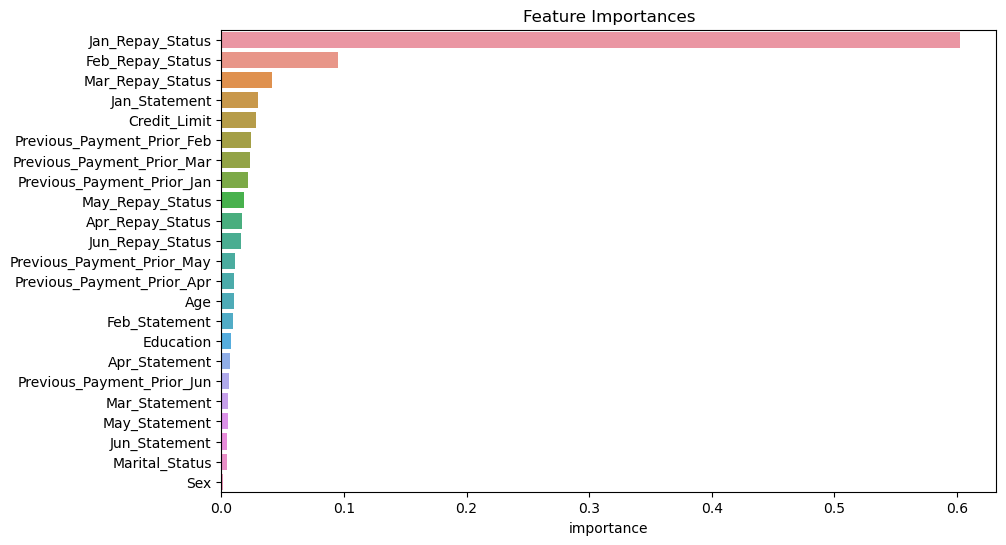

In [62]:

# Feature importance
feature_importances = pd.DataFrame(gb_model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()